In [2]:
from convert_solutions_roel.ns_lib.dataset import *
from convert_solutions_roel.ns_lib.convert import *
import matplotlib.pyplot as plt


import pymssql
import warnings
warnings.filterwarnings('ignore')

In [3]:
# connect database to also retrieve roels' solutions
conn = pymssql.connect(server="localhost", user="sa", password="P@55w0rd", database="NEDTRAIN_KBH_3ksol")
cursor = conn.cursor()
%time ta01, ta02, ta03, ta04, ta07, ta09, ta10, ta11, ta27, ta28, ta29 = read_ta(conn)
%time ti02, ti03, ti05, ti07, ti08 = read_ti(conn, time_convert)
%time tOPGo04, tOPGo05, tOPGo06, tOPGo07, tOPGo10 = read_tOPGo(conn, time_convert)

OperationalError: (20009, b'DB-Lib error message 20009, severity 9:\nUnable to connect: Adaptive Server is unavailable or does not exist\nNet-Lib error during Connection refused (61)\n')

In [9]:
#Now we only look at the instances that the best algorithm solved. 
instances_analysis_best_run = pd.read_csv('best_model_solved_instances.csv')
selected_instances = instances_analysis_best_run.loc[instances_analysis_best_run.solved==1].instance_id
print(len(selected_instances))

2569


# Generate DF with [my actions, roel's actions, random actions]

In [10]:
#1521138212 is our best agent. let's dive into that. 
filename = 'data_'+model_nr+'_paper.csv'

In [11]:
def get_event_list_roel(instance_id, nr_arrivals):
    try:
        trainunits, services, actions, arrivals, departures = get_instance(instance_id, ta01, ti05, ti07, ti08, tOPGo04, tOPGo05, tOPGo06, tOPGo07, tOPGo10)
        df = []

        for action in actions:
            df.append(action.print_action())

        correct_df = []
        for lis in df:
            if lis[0] == 'Move: train_id:':
                correct_df.append(lis)

        df = pd.DataFrame(correct_df, columns=['move','id','time','start','--','end','track','starttrack','--','endtrack'])
        action_list = df.endtrack
    except:
        print("Caught it!")
        action_list = [-1] * nr_arrivals
        
    return pd.Series(action_list)


import pandas as pd

data = pd.read_csv(filename)
data = data.loc[data.instance_id.isin(selected_instances)][['instance_id', 'step', 'strtype', 'action']].copy()

count = 0
for instanceid in data.instance_id.unique():
    select_ = data.loc[data.instance_id == instanceid].sort('step').reset_index(drop = True).copy()
    nr_arrivals = len(select_)
    
    action_series = get_event_list_roel(instanceid, nr_arrivals)
    select_['action_roel'] = action_series
    
    #append random actions 
    if len(action_series)>0:
        select_['action_random'] = np.random.randint(1,10, size=len(action_series))
    else: 
        select_['action_random'] = action_series
    print(select_)
    
    if count == 0:
        new_data = select_.copy()
    else: 
        new_data = new_data.append(select_)
   
    count = count + 1

   instance_id  step       strtype  action  action_roel  action_random
0         5000     0        ['14']       8            3              1
1         5000     1        ['16']       2            2              1
2         5000     2        ['24']       7            4              1
3         5000     3  ['24', '24']       7            7              3
4         5000     4  ['24', '24']       5            5              6
5         5000     5  ['14', '14']       8            6              7
6         5000     6  ['24', '26']       6            9              8
7         5000     7  ['16', '14']       1            1              5
8         5000     8        ['26']       4            8              9
   instance_id  step       strtype  action  action_roel  action_random
0         5001     0        ['26']       5            3              6
1         5001     1        ['16']       2            2              9
2         5001     2  ['24', '24']       9            8              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5014     0  ['24', '24']       7            8              5
1         5014     1        ['24']       9            4              2
2         5014     2        ['16']       3            7              4
3         5014     3  ['14', '14']       8            6              4
4         5014     4  ['24', '26']       6            5              9
5         5014     5  ['24', '24']       9            9              3
6         5014     6        ['26']       5            8              9
7         5014     7        ['14']       8            9              1
8         5014     8  ['16', '14']       1            1              2
   instance_id  step       strtype  action  action_roel  action_random
0         5015     0        ['26']       5            4              1
1         5015     1  ['16', '14']       1            7              9
2         5015     2        ['24']       7            7              8
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5029     0  ['24', '24']       7            7              5
1         5029     1  ['14', '14']       8            8              5
2         5029     2  ['24', '24']       9            9              8
3         5029     3  ['16', '14']       1            5              7
4         5029     4        ['26']       5            9              3
5         5029     5  ['24', '26']       6            6              8
6         5029     6        ['24']       7            8              8
7         5029     7        ['16']       2            1              2
8         5029     8        ['14']       8            4              5
   instance_id  step       strtype  action  action_roel  action_random
0         5030     0        ['16']       2            9              9
1         5030     1  ['14', '14']       8            7              3
2         5030     2  ['14', '16']       1            6              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5043     0  ['24', '24']       7            8              8
1         5043     1  ['24', '24']       9            6              4
2         5043     2        ['26']       5            7              8
3         5043     3        ['24']       2            8              1
4         5043     4        ['14']       8            3              4
5         5043     5  ['14', '14']       8            9              7
6         5043     6  ['14', '16']       1            1              1
7         5043     7  ['26', '24']       6            5              2
8         5043     8        ['16']       3            4              9
   instance_id  step       strtype  action  action_roel  action_random
0         5044     0  ['14', '14']       8            4              6
1         5044     1  ['24', '26']       6            1              7
2         5044     2        ['16']       2            6              1
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5057     0        ['14']       8            8              9
1         5057     1        ['24']       7            2              9
2         5057     2        ['16']       2            3              7
3         5057     3  ['14', '16']       1            7              2
4         5057     4  ['24', '24']       9            4              9
5         5057     5        ['26']       5            6              6
6         5057     6  ['24', '24']       4            8              8
7         5057     7  ['26', '24']       6            9              7
8         5057     8  ['14', '14']       8            5              2
   instance_id  step       strtype  action  action_roel  action_random
0         5058     0  ['24', '26']       6            8              7
1         5058     1  ['24', '24']       7            5              3
2         5058     2  ['24', '24']       5            7              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5072     0  ['14', '14']       8            6              8
1         5072     1  ['24', '24']       7            7              7
2         5072     2        ['24']       9            2              7
3         5072     3        ['14']       8            8              8
4         5072     4  ['26', '24']       6            9              5
5         5072     5        ['26']       5            8              2
6         5072     6  ['24', '24']       4            9              5
7         5072     7  ['16', '14']       1            5              3
8         5072     8        ['16']       2            1              8
   instance_id  step       strtype  action  action_roel  action_random
0         5073     0  ['24', '24']       7            9              9
1         5073     1        ['26']       5            8              1
2         5073     2  ['24', '24']       9            6              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5084     0        ['24']       7            3              4
1         5084     1  ['16', '14']       1            9              5
2         5084     2        ['16']       3            7              3
3         5084     3        ['14']       8            1              1
4         5084     4  ['24', '26']       6            5              1
5         5084     5  ['24', '24']       9            6              2
6         5084     6        ['26']       5            9              9
7         5084     7  ['14', '14']       8            4              3
8         5084     8  ['24', '24']       4            8              8
   instance_id  step       strtype  action  action_roel  action_random
0         5086     0        ['24']       7            4              5
1         5086     1        ['14']       8            2              5
2         5086     2        ['26']       2            7              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5097     0  ['14', '16']       1            9              9
1         5097     1        ['16']       3            5              5
2         5097     2  ['14', '14']       8            8              8
3         5097     3  ['24', '26']       6            1              9
4         5097     4  ['24', '24']       7            7              9
5         5097     5        ['14']       8            6              5
6         5097     6        ['24']       2            6              5
7         5097     7        ['26']       5            9              3
8         5097     8  ['24', '24']       4            4              6
   instance_id  step       strtype  action  action_roel  action_random
0         5098     0        ['24']       2            3              4
1         5098     1        ['26']       5            2              2
2         5098     2  ['14', '14']       8            9              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5111     0  ['16', '14']       1            7              3
1         5111     1  ['24', '24']       7            9              4
2         5111     2        ['16']       3            5              2
3         5111     3  ['26', '24']       6            9              5
4         5111     4  ['24', '24']       5            1              1
5         5111     5  ['14', '14']       8            8              7
6         5111     6        ['14']       8            4              1
7         5111     7        ['26']       2            6              8
8         5111     8        ['24']       9            2              1
   instance_id  step       strtype  action  action_roel  action_random
0         5112     0  ['16', '14']       1            9              5
1         5112     1  ['14', '14']       8            8              7
2         5112     2  ['24', '24']       5            7              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5123     0  ['26', '24']       6            9              7
1         5123     1        ['14']       8            3              5
2         5123     2  ['24', '24']       5            8              3
3         5123     3  ['16', '14']       1            5              9
4         5123     4        ['16']       2            2              1
5         5123     5        ['24']       9            9              4
6         5123     6  ['14', '14']       8            4              2
7         5123     7        ['26']       3            7              2
8         5123     8  ['24', '24']       7            6              4
   instance_id  step       strtype  action  action_roel  action_random
0         5124     0  ['14', '16']       5            9              7
1         5124     1  ['24', '24']       9            8              2
2         5124     2  ['26', '24']       6            6              3
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5139     0        ['14']       8            4              9
1         5139     1        ['24']       9            3              3
2         5139     2        ['16']       2            2              4
3         5139     3  ['14', '16']       1            8              9
4         5139     4  ['24', '24']       9            6              2
5         5139     5        ['26']       5            7              5
6         5139     6  ['14', '14']       8            5              4
7         5139     7  ['24', '24']       4            1              8
8         5139     8  ['24', '26']       6            9              3
   instance_id  step       strtype  action  action_roel  action_random
0         5140     0        ['24']       7            8              7
1         5140     1        ['26']       5            3              9
2         5140     2        ['14']       8            7              8
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5154     0        ['16']       2            4              3
1         5154     1        ['24']       9            3              5
2         5154     2  ['14', '16']       1            5              6
3         5154     3  ['24', '26']       6            8              2
4         5154     4  ['14', '14']       8            8              3
5         5154     5        ['14']       8            9              3
6         5154     6  ['24', '24']       5            6              8
7         5154     7  ['24', '24']       7            9              1
8         5154     8        ['26']       4            1              5
   instance_id  step       strtype  action  action_roel  action_random
0         5155     0  ['14', '14']       8            4              9
1         5155     1  ['16', '14']       1            9              6
2         5155     2  ['24', '24']       5            8              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5167     0  ['24', '24']       7            5              3
1         5167     1  ['24', '24']       5            8              7
2         5167     2  ['14', '14']       8            7              7
3         5167     3        ['16']       2            7              4
4         5167     4  ['14', '16']       1            1              1
5         5167     5        ['14']       8            4              5
6         5167     6        ['24']       9            3              7
7         5167     7  ['24', '26']       6            6              5
8         5167     8        ['26']       4            9              2
   instance_id  step       strtype  action  action_roel  action_random
0         5168     0  ['24', '24']       7            9              8
1         5168     1        ['26']       5            1              7
2         5168     2        ['14']       8            6              6
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5180     0        ['26']       5            1              1
1         5180     1  ['16', '14']       1            8              3
2         5180     2  ['14', '14']       8            7              9
3         5180     3        ['24']       7            2              2
4         5180     4        ['14']       8            7              4
5         5180     5  ['24', '24']       4            9              6
6         5180     6        ['16']       3            6              1
7         5180     7  ['24', '24']       9            4              1
8         5180     8  ['26', '24']       6            5              6
   instance_id  step       strtype  action  action_roel  action_random
0         5181     0  ['24', '24']       7            7              2
1         5181     1        ['16']       2            7              7
2         5181     2  ['14', '14']       8            5              2
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5192     0  ['14', '14']       8            6              5
1         5192     1        ['16']       3            3              3
2         5192     2        ['24']       7            6              5
3         5192     3  ['24', '26']       6            5              8
4         5192     4        ['14']       8            4              3
5         5192     5  ['24', '24']       5            9              4
6         5192     6  ['24', '24']       7            8              5
7         5192     7        ['26']       4            2              7
8         5192     8  ['14', '16']       1            1              4
   instance_id  step       strtype  action  action_roel  action_random
0         5193     0        ['26']       5            8              2
1         5193     1        ['16']       3            9              3
2         5193     2  ['24', '24']       7            9              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5207     0        ['26']       5            7              9
1         5207     1        ['16']       2            9              9
2         5207     2  ['24', '26']       6            6              8
3         5207     3        ['24']       9            9              4
4         5207     4  ['24', '24']       7            8              6
5         5207     5  ['16', '14']       1            5              2
6         5207     6        ['14']       8            8              7
7         5207     7  ['14', '14']       8            9              7
8         5207     8  ['24', '24']       4            4              8
   instance_id  step       strtype  action  action_roel  action_random
0         5208     0        ['14']       8            5              8
1         5208     1        ['16']       3            2              8
2         5208     2  ['24', '24']       7            6              2
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5221     0        ['14']       8            2              9
1         5221     1  ['24', '24']       7            4              4
2         5221     2  ['26', '24']       6            9              9
3         5221     3        ['24']       9            7              3
4         5221     4  ['24', '24']       9            5              7
5         5221     5        ['26']       2            8              1
6         5221     6  ['14', '14']       8            6              3
7         5221     7        ['16']       4            7              3
8         5221     8  ['16', '14']       1            1              3
   instance_id  step       strtype  action  action_roel  action_random
0         5222     0        ['16']       2            3              3
1         5222     1        ['24']       9            8              6
2         5222     2  ['16', '14']       1            7              1
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5236     0        ['16']       2            9              9
1         5236     1  ['24', '26']       6            8              1
2         5236     2  ['24', '24']       9            9              3
3         5236     3        ['26']       5            5              9
4         5236     4  ['16', '14']       1            1              3
5         5236     5        ['14']       8            4              8
6         5236     6        ['24']       9            2              2
7         5236     7  ['24', '24']       7            7              2
8         5236     8  ['14', '14']       4            6              1
   instance_id  step       strtype  action  action_roel  action_random
0         5237     0  ['14', '14']       8            4              8
1         5237     1        ['26']       5            5              4
2         5237     2        ['24']       7            8              7
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5250     0  ['26', '24']       6            8              1
1         5250     1  ['24', '24']       7            6              5
2         5250     2  ['14', '14']       8            1              6
3         5250     3        ['14']       8            7              9
4         5250     4        ['16']       2            9              8
5         5250     5        ['24']       5            6              1
6         5250     6  ['14', '16']       1            5              1
7         5250     7  ['24', '24']       5            8              7
8         5250     8        ['26']       4            9              9
   instance_id  step       strtype  action  action_roel  action_random
0         5252     0  ['24', '24']       7            4              1
1         5252     1        ['16']       2            5              7
2         5252     2        ['26']       5            7              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5265     0  ['14', '14']       8            5              3
1         5265     1  ['26', '24']       6            8              1
2         5265     2  ['16', '14']       1            9              7
3         5265     3        ['16']       3            7              8
4         5265     4  ['24', '24']       5            1              7
5         5265     5        ['14']       8            2              6
6         5265     6        ['24']       7            9              5
7         5265     7  ['24', '24']       4            6              2
8         5265     8        ['26']       2            8              5
   instance_id  step       strtype  action  action_roel  action_random
0         5267     0        ['16']       2            1              4
1         5267     1  ['14', '16']       1            9              8
2         5267     2  ['24', '24']       9            8              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5282     0  ['24', '24']       7            7              9
1         5282     1        ['14']       8            1              2
2         5282     2  ['24', '24']       5            4              2
3         5282     3        ['26']       2            6              4
4         5282     4  ['24', '26']       6            9              5
5         5282     5  ['14', '16']       1            5              8
6         5282     6  ['14', '14']       8            8              9
7         5282     7        ['16']       3            1              2
8         5282     8        ['24']       9            3              1
   instance_id  step       strtype  action  action_roel  action_random
0         5283     0        ['16']       3            2              1
1         5283     1  ['16', '14']       1            9              5
2         5283     2  ['24', '24']       5            7              1
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5297     0  ['24', '26']       6            6              4
1         5297     1        ['24']       2            3              3
2         5297     2        ['16']       5            2              6
3         5297     3  ['24', '24']       9            9              6
4         5297     4  ['16', '14']       1            9              8
5         5297     5        ['14']       8            1              4
6         5297     6  ['24', '24']       7            7              3
7         5297     7        ['26']       7            5              6
8         5297     8  ['14', '14']       8            8              4
   instance_id  step       strtype  action  action_roel  action_random
0         5301     0        ['14']       8            6              5
1         5301     1        ['24']       7            6              2
2         5301     2  ['14', '16']       1            5              3
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5316     0  ['14', '16']       1            9              6
1         5316     1        ['24']       9            2              3
2         5316     2        ['16']       3            6              9
3         5316     3  ['14', '14']       8            9              7
4         5316     4        ['14']       8            7              2
5         5316     5  ['24', '24']       9            5              5
6         5316     6        ['26']       5            8              5
7         5316     7  ['26', '24']       6            8              6
8         5316     8  ['24', '24']       4            4              9
   instance_id  step       strtype  action  action_roel  action_random
0         5317     0  ['26', '24']       6            8              8
1         5317     1  ['24', '24']       7            9              3
2         5317     2  ['24', '24']       9            7              8
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5329     0  ['14', '14']       8            9              2
1         5329     1  ['24', '24']       7            8              2
2         5329     2        ['16']       2            9              8
3         5329     3        ['24']       9            2              3
4         5329     4  ['24', '26']       6            1              7
5         5329     5  ['24', '24']       5            6              7
6         5329     6        ['14']       8            8              9
7         5329     7  ['14', '16']       1            7              1
8         5329     8        ['26']       4            4              6
   instance_id  step       strtype  action  action_roel  action_random
0         5331     0        ['24']       9            4              6
1         5331     1  ['24', '24']       7            1              5
2         5331     2  ['26', '24']       6            9              7
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5342     0        ['14']       8            2              2
1         5342     1        ['24']       7            9              7
2         5342     2        ['16']       3            9              6
3         5342     3  ['24', '24']       7            8              7
4         5342     4  ['14', '14']       8            7              9
5         5342     5        ['26']       5            4              4
6         5342     6  ['24', '26']       6            5              2
7         5342     7  ['16', '14']       1            6              9
8         5342     8  ['24', '24']       4            9              8
   instance_id  step       strtype  action  action_roel  action_random
0         5343     0        ['16']       2            2              2
1         5343     1  ['14', '16']       1            7              8
2         5343     2        ['14']       8            3              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5356     0  ['24', '24']       7            5              9
1         5356     1  ['14', '14']       8            9              3
2         5356     2  ['24', '26']       6            7              8
3         5356     3        ['16']       3            5              7
4         5356     4        ['26']       5            9              5
5         5356     5  ['14', '16']       1            8              9
6         5356     6        ['14']       8            4              2
7         5356     7        ['24']       2            2              9
8         5356     8  ['24', '24']       4            1              1
   instance_id  step       strtype  action  action_roel  action_random
0         5357     0  ['24', '24']       7            1              4
1         5357     1  ['24', '24']       5            8              6
2         5357     2  ['24', '26']       6            7              2
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5371     0        ['26']       5            9              3
1         5371     1  ['24', '26']       6            7              4
2         5371     2        ['16']       2            9              8
3         5371     3        ['14']       8            5              1
4         5371     4  ['24', '24']       9            1              2
5         5371     5  ['16', '14']       1            6              3
6         5371     6        ['24']       9            8              6
7         5371     7  ['14', '14']       8            4              4
8         5371     8  ['24', '24']       4            8              3
   instance_id  step       strtype  action  action_roel  action_random
0         5374     0        ['16']       2            3              8
1         5374     1  ['14', '16']       1            8              7
2         5374     2        ['14']       8            7              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5386     0  ['24', '24']       7            9              7
1         5386     1        ['14']       8            2              8
2         5386     2  ['14', '16']       1            1              5
3         5386     3  ['24', '26']       6            8              8
4         5386     4        ['16']       2            3              9
5         5386     5  ['24', '24']       5            8              5
6         5386     6        ['26']       4            6              8
7         5386     7        ['24']       9            7              6
8         5386     8  ['14', '14']       8            4              2
   instance_id  step       strtype  action  action_roel  action_random
0         5387     0        ['26']       5            8              4
1         5387     1  ['16', '14']       1            7              9
2         5387     2        ['16']       3            5              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5400     0  ['14', '14']       8            5              3
1         5400     1        ['16']       2            9              7
2         5400     2        ['26']       5            9              5
3         5400     3        ['14']       8            7              9
4         5400     4  ['24', '26']       6            8              4
5         5400     5        ['24']       7            7              5
6         5400     6  ['24', '24']       9            6              6
7         5400     7  ['24', '24']       4            4              7
8         5400     8  ['16', '14']       1            1              1
   instance_id  step       strtype  action  action_roel  action_random
0         5401     0  ['16', '14']       1            9              9
1         5401     1  ['24', '24']       7            4              9
2         5401     2  ['14', '14']       8            8              8
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5414     0        ['16']       2            7              3
1         5414     1  ['24', '26']       6            6              9
2         5414     2  ['24', '24']       7            7              9
3         5414     3  ['24', '24']       5            5              3
4         5414     4        ['24']       9            5              4
5         5414     5        ['14']       8            3              9
6         5414     6        ['26']       4            8              5
7         5414     7  ['14', '16']       1            9              7
8         5414     8  ['14', '14']       8            4              1
   instance_id  step       strtype  action  action_roel  action_random
0         5417     0        ['24']       2            3              9
1         5417     1  ['14', '14']       8            9              9
2         5417     2        ['16']       1            9              6
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5431     0        ['16']       2            4              6
1         5431     1  ['24', '24']       7            7              9
2         5431     2        ['14']       8            2              5
3         5431     3  ['14', '16']       1            9              8
4         5431     4  ['14', '14']       8            5              6
5         5431     5  ['24', '24']       5            8              9
6         5431     6  ['24', '26']       6            1              1
7         5431     7        ['24']       7            6              8
8         5431     8        ['26']       4            3              5
   instance_id  step       strtype  action  action_roel  action_random
0         5432     0  ['24', '24']       7            4              2
1         5432     1  ['14', '14']       8            5              7
2         5432     2  ['24', '26']       6            1              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5444     0  ['24', '24']       7            4              4
1         5444     1  ['14', '14']       8            8              3
2         5444     2        ['16']       2            5              5
3         5444     3        ['24']       9            8              9
4         5444     4  ['14', '16']       1            7              1
5         5444     5        ['14']       8            2              6
6         5444     6        ['26']       5            9              2
7         5444     7  ['24', '24']       9            1              9
8         5444     8  ['24', '26']       6            6              2
   instance_id  step       strtype  action  action_roel  action_random
0         5445     0  ['24', '24']       7            7              2
1         5445     1        ['14']       8            3              7
2         5445     2        ['24']       9            9              7
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5457     0  ['16', '14']       1            1              3
1         5457     1  ['14', '14']       8            7              4
2         5457     2        ['26']       5            9              3
3         5457     3  ['24', '24']       9            8              1
4         5457     4        ['24']       7            2              5
5         5457     5        ['14']       8            8              4
6         5457     6        ['16']       3            4              6
7         5457     7  ['24', '24']       4            9              4
8         5457     8  ['26', '24']       6            6              8
   instance_id  step       strtype  action  action_roel  action_random
0         5458     0        ['26']       5            9              4
1         5458     1  ['16', '14']       1            7              1
2         5458     2        ['14']       8            2              2
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5472     0  ['14', '16']       1            5              7
1         5472     1        ['16']       3            8              8
2         5472     2  ['24', '24']       7            4              9
3         5472     3        ['14']       8            2              1
4         5472     4  ['24', '24']       5            6              9
5         5472     5  ['24', '26']       6            7              1
6         5472     6        ['24']       9            7              2
7         5472     7  ['14', '14']       8            9              7
8         5472     8        ['26']       2            3              7
   instance_id  step       strtype  action  action_roel  action_random
0         5473     0  ['24', '24']       9            6              3
1         5473     1  ['16', '14']       1            8              7
2         5473     2  ['26', '24']       6            1              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5485     0  ['16', '14']       1            5              9
1         5485     1        ['26']       5            8              2
2         5485     2        ['24']       7            2              6
3         5485     3  ['24', '24']       9            6              1
4         5485     4  ['24', '24']       9            7              1
5         5485     5  ['26', '24']       6            1              1
6         5485     6  ['14', '14']       8            9              9
7         5485     7        ['16']       2            8              8
8         5485     8        ['14']       8            4              5
   instance_id  step       strtype  action  action_roel  action_random
0         5487     0  ['24', '26']       6            7              4
1         5487     1        ['26']       2            1              1
2         5487     2  ['24', '24']       7            5              1
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5499     0  ['24', '24']       7            9              4
1         5499     1  ['24', '24']       9            7              9
2         5499     2  ['14', '16']       1            6              1
3         5499     3        ['26']       5            9              5
4         5499     4  ['24', '26']       6            8              8
5         5499     5        ['24']       2            1              3
6         5499     6        ['16']       3            5              2
7         5499     7  ['14', '14']       4            4              7
8         5499     8        ['14']       8            8              4
   instance_id  step       strtype  action  action_roel  action_random
0         5500     0  ['24', '24']       7            8              8
1         5500     1  ['14', '14']       8            9              5
2         5500     2        ['16']       3            7              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5511     0        ['26']       5            5              2
1         5511     1  ['14', '16']       1            8              5
2         5511     2        ['16']       3            5              9
3         5511     3        ['14']       8            2              5
4         5511     4        ['24']       7            1              5
5         5511     5  ['24', '24']       7            8              6
6         5511     6  ['14', '14']       8            9              5
7         5511     7  ['24', '24']       4            7              1
8         5511     8  ['26', '24']       6            6              4
   instance_id  step       strtype  action  action_roel  action_random
0         5512     0  ['24', '24']       7            5              5
1         5512     1  ['14', '16']       1            8              7
2         5512     2        ['24']       9            5              6
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5524     0        ['26']       5            6              8
1         5524     1        ['24']       2            2              5
2         5524     2  ['14', '14']       8            5              9
3         5524     3        ['16']       3            4              6
4         5524     4  ['24', '24']       7            6              5
5         5524     5  ['26', '24']       6            8              5
6         5524     6  ['24', '24']       9            7              4
7         5524     7        ['14']       8            3              6
8         5524     8  ['14', '16']       1            9              2
   instance_id  step       strtype  action  action_roel  action_random
0         5525     0  ['14', '14']       8            9              8
1         5525     1  ['16', '14']       1            8              2
2         5525     2        ['24']       7            4              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5537     0        ['16']       3            2              5
1         5537     1        ['26']       5            1              1
2         5537     2  ['24', '26']       6            7              1
3         5537     3        ['24']       7            3              8
4         5537     4  ['24', '24']       7            8              3
5         5537     5  ['14', '14']       8            5              4
6         5537     6  ['24', '24']       9            9              3
7         5537     7  ['14', '16']       1            6              1
8         5537     8        ['14']       8            4              8
   instance_id  step       strtype  action  action_roel  action_random
0         5538     0  ['24', '24']       7            6              5
1         5538     1  ['14', '14']       8            8              6
2         5538     2  ['16', '14']       1            9              3
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5550     0        ['26']       5            4              1
1         5550     1  ['14', '14']       8            1              8
2         5550     2        ['14']       8            3              9
3         5550     3        ['24']       7            2              2
4         5550     4  ['16', '14']       1            8              5
5         5550     5  ['24', '24']       7            5              8
6         5550     6        ['16']       3            9              6
7         5550     7  ['26', '24']       6            7              2
8         5550     8  ['24', '24']       4            6              9
   instance_id  step       strtype  action  action_roel  action_random
0         5551     0  ['26', '24']       6            9              1
1         5551     1        ['14']       8            8              7
2         5551     2  ['24', '24']       5            7              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5565     0        ['26']       2            2              3
1         5565     1  ['24', '24']       7            9              1
2         5565     2        ['24']       9            3              3
3         5565     3  ['24', '24']       4            5              4
4         5565     4        ['14']       8            4              2
5         5565     5  ['14', '16']       1            8              6
6         5565     6  ['26', '24']       6            7              3
7         5565     7  ['14', '14']       8            6              5
8         5565     8        ['16']       3            1              5
   instance_id  step       strtype  action  action_roel  action_random
0         5566     0        ['16']       2            3              3
1         5566     1  ['24', '24']       7            1              9
2         5566     2        ['24']       9            2              2
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5578     0  ['16', '14']       1            9              8
1         5578     1  ['24', '24']       7            7              7
2         5578     2        ['14']       8            5              6
3         5578     3  ['24', '26']       6            6              8
4         5578     4        ['26']       2            2              8
5         5578     5  ['24', '24']       5            9              2
6         5578     6  ['14', '14']       8            4              7
7         5578     7        ['16']       3            8              3
8         5578     8        ['24']       9            3              7
   instance_id  step       strtype  action  action_roel  action_random
0         5579     0        ['14']       8            9              7
1         5579     1        ['26']       5            2              5
2         5579     2        ['24']       7            9              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5591     0        ['14']       8            8              1
1         5591     1        ['26']       5            3              8
2         5591     2  ['24', '24']       9            7              9
3         5591     3        ['16']       2            8              5
4         5591     4  ['16', '14']       1            6              9
5         5591     5  ['24', '26']       6            5              7
6         5591     6  ['24', '24']       4            9              6
7         5591     7        ['24']       7            2              1
8         5591     8  ['14', '14']       8            1              5
   instance_id  step       strtype  action  action_roel  action_random
0         5592     0        ['24']       7            2              9
1         5592     1        ['26']       5            3              2
2         5592     2  ['24', '24']       9            7              3
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5606     0  ['24', '26']       6            7              9
1         5606     1  ['24', '24']       7            1              3
2         5606     2  ['24', '24']       5            6              6
3         5606     3        ['24']       2            5              4
4         5606     4        ['14']       8            4              5
5         5606     5  ['14', '14']       8            8              7
6         5606     6        ['26']       4            8              4
7         5606     7  ['14', '16']       1            9              2
8         5606     8        ['16']       3            3              1
   instance_id  step       strtype  action  action_roel  action_random
0         5607     0        ['16']       2            2              5
1         5607     1  ['14', '16']       1            6              5
2         5607     2  ['24', '24']       7            7              7
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5619     0  ['24', '26']       6            8              1
1         5619     1  ['24', '24']       7            4              5
2         5619     2        ['16']       2            7              6
3         5619     3  ['24', '24']       5            1              8
4         5619     4  ['14', '14']       8            8              9
5         5619     5        ['14']       8            6              9
6         5619     6        ['24']       9            5              5
7         5619     7  ['14', '16']       1            9              1
8         5619     8        ['26']       4            6              8
   instance_id  step       strtype  action  action_roel  action_random
0         5620     0        ['14']       8            4              3
1         5620     1  ['24', '26']       6            9              6
2         5620     2  ['14', '14']       8            1              3
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5633     0  ['14', '16']       1            9              3
1         5633     1        ['14']       8            3              9
2         5633     2  ['24', '24']       9            7              3
3         5633     3        ['24']       7            7              6
4         5633     4  ['24', '24']       7            8              8
5         5633     5        ['26']       5            2              1
6         5633     6        ['16']       3            1              1
7         5633     7  ['26', '24']       6            6              3
8         5633     8  ['14', '14']       4            5              3
   instance_id  step       strtype  action  action_roel  action_random
0         5634     0        ['14']       8            4              2
1         5634     1        ['24']       9            7              7
2         5634     2        ['16']       3            8              8
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5645     0  ['16', '14']       1            7              3
1         5645     1  ['26', '24']       6            9              9
2         5645     2        ['16']       2            1              6
3         5645     3  ['24', '24']       5            6              9
4         5645     4  ['24', '24']       7            8              1
5         5645     5        ['24']       9            5              9
6         5645     6  ['14', '14']       8            4              5
7         5645     7        ['26']       4            9              3
8         5645     8        ['14']       8            2              3
   instance_id  step       strtype  action  action_roel  action_random
0         5646     0  ['14', '16']       1            1              6
1         5646     1  ['24', '26']       6            9              7
2         5646     2  ['24', '24']       7            5              9
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5658     0        ['26']       2            4              2
1         5658     1  ['24', '24']       7            5              3
2         5658     2        ['24']       9            3              2
3         5658     3        ['14']       8            2              7
4         5658     4  ['16', '14']       1            9              8
5         5658     5  ['26', '24']       6            8              2
6         5658     6  ['24', '24']       5            6              1
7         5658     7  ['14', '14']       8            7              1
8         5658     8        ['16']       4            1              1
   instance_id  step       strtype  action  action_roel  action_random
0         5659     0  ['14', '16']       1            8              2
1         5659     1  ['24', '24']       7            7              6
2         5659     2        ['16']       3            6              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5670     0        ['14']       8            4              9
1         5670     1  ['14', '16']       1            7              9
2         5670     2  ['24', '24']       7            8              3
3         5670     3  ['14', '14']       8            5              1
4         5670     4        ['16']       3            3              1
5         5670     5  ['24', '26']       6            6              9
6         5670     6        ['24']       2            1              1
7         5670     7        ['26']       5            8              9
8         5670     8  ['24', '24']       4            9              5
   instance_id  step       strtype  action  action_roel  action_random
0         5671     0        ['26']       5            5              2
1         5671     1  ['16', '14']       1            9              6
2         5671     2        ['16']       3            8              7
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5686     0        ['26']       5            4              4
1         5686     1  ['14', '14']       8            9              5
2         5686     2        ['14']       8            9              4
3         5686     3        ['24']       7            7              4
4         5686     4  ['24', '24']       7            8              3
5         5686     5  ['26', '24']       6            5              5
6         5686     6        ['16']       2            8              8
7         5686     7  ['24', '24']       4            6              4
8         5686     8  ['16', '14']       1            1              8
   instance_id  step       strtype  action  action_roel  action_random
0         5687     0        ['14']       8            2              6
1         5687     1  ['24', '24']       7            8              7
2         5687     2        ['26']       5            1              4
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5702     0        ['24']       7            2              1
1         5702     1  ['14', '14']       8            5              7
2         5702     2  ['24', '24']       9            6              7
3         5702     3        ['26']       2            5              4
4         5702     4        ['16']       3            1              7
5         5702     5  ['24', '24']       7            9              2
6         5702     6        ['14']       8            1              2
7         5702     7  ['24', '26']       6            7              1
8         5702     8  ['14', '16']       1            8              7
   instance_id  step       strtype  action  action_roel  action_random
0         5703     0        ['24']       7            5              1
1         5703     1        ['14']       8            9              5
2         5703     2  ['24', '24']       7            8              6
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5714     0  ['24', '24']       7            5              3
1         5714     1        ['14']       8            1              9
2         5714     2        ['16']       3            8              1
3         5714     3  ['24', '24']       5            8              1
4         5714     4        ['26']       2            2              3
5         5714     5  ['14', '14']       4            9              1
6         5714     6  ['16', '14']       1            7              7
7         5714     7        ['24']       7            8              3
8         5714     8  ['26', '24']       6            6              7
   instance_id  step       strtype  action  action_roel  action_random
0         5715     0  ['24', '24']       7            4              1
1         5715     1  ['24', '24']       5            6              9
2         5715     2  ['14', '14']       8            7              7
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5731     0  ['24', '24']       7            4              7
1         5731     1  ['24', '26']       6            1              5
2         5731     2        ['26']       5            5              2
3         5731     3        ['24']       9            3              4
4         5731     4        ['16']       2            8              9
5         5731     5  ['14', '14']       8            8              4
6         5731     6        ['14']       8            8              9
7         5731     7  ['16', '14']       1            7              6
8         5731     8  ['24', '24']       4            9              1
   instance_id  step       strtype  action  action_roel  action_random
0         5733     0        ['14']       8            4              5
1         5733     1  ['26', '24']       6            9              2
2         5733     2  ['16', '14']       1            8              5
3     

   instance_id  step       strtype  action  action_roel  action_random
0         5747     0  ['14', '14']       8            7              3
1         5747     1        ['26']       5            1              9
2         5747     2  ['16', '14']       1            8              9
3         5747     3  ['26', '24']       6            6              6
4         5747     4  ['24', '24']       7            5              9
5         5747     5        ['14']       8            1              1
6         5747     6        ['16']       3            3              7
7         5747     7        ['24']       2            8              5
8         5747     8  ['24', '24']       4            9              1
   instance_id  step       strtype  action  action_roel  action_random
0         5748     0        ['14']       8            4              3
1         5748     1  ['16', '14']       1            9              2
2         5748     2        ['26']       5            3              6
3     

    instance_id  step       strtype  action  action_roel  action_random
0          5759     0        ['14']       8            2              2
1          5759     1        ['26']       5            9              3
2          5759     2  ['24', '24']       7            7              7
3          5759     3  ['14', '14']       8            9              4
4          5759     4        ['26']       4            5              3
5          5759     5        ['24']       2            7              1
6          5759     6        ['24']       9            4              8
7          5759     7        ['16']       3            6              1
8          5759     8  ['14', '16']       1            1              8
9          5759     9        ['24']       7            4              8
10         5759    10  ['24', '26']       6            8              9
    instance_id  step       strtype  action  action_roel  action_random
0          5760     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          5771     0  ['14', '16']       1            9              8
1          5771     1  ['26', '24']       6            8              1
2          5771     2        ['24']       7            8              4
3          5771     3  ['14', '14']       8            7              6
4          5771     4        ['24']       7            5              4
5          5771     5        ['24']       5            9              7
6          5771     6  ['24', '24']       9            1              9
7          5771     7        ['26']       2            6              4
8          5771     8        ['14']       5            4              1
9          5771     9        ['16']       3            3              6
10         5771    10        ['26']       4            5              9
    instance_id  step       strtype  action  action_roel  action_random
0          5772     0  ['26', '24']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5785     0        ['16']       3            5              3
1          5785     1  ['24', '24']       9            8              7
2          5785     2        ['24']       7            7              6
3          5785     3  ['16', '14']       1            7              1
4          5785     4        ['26']       5            5              9
5          5785     5        ['26']       2            8              4
6          5785     6        ['14']       8            8              8
7          5785     7        ['24']       7            6              7
8          5785     8  ['14', '14']       8            9              6
9          5785     9  ['26', '24']       6            1              6
10         5785    10        ['24']       7            4              3
    instance_id  step       strtype  action  action_roel  action_random
0          5786     0        ['16']       2            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5796     0  ['24', '24']       7            9              3
1          5796     1  ['14', '16']       1            7              3
2          5796     2        ['14']       8            8              5
3          5796     3        ['16']       3            1              1
4          5796     4        ['26']       5            5              2
5          5796     5  ['14', '14']       8            8              2
6          5796     6        ['26']       4            9              3
7          5796     7        ['24']       7            3              2
8          5796     8        ['24']       2            1              8
9          5796     9  ['24', '26']       6            6              8
10         5796    10        ['24']       9            4              7
    instance_id  step       strtype  action  action_roel  action_random
0          5797     0        ['16']       2            8        

    instance_id  step       strtype  action  action_roel  action_random
0          5806     0        ['16']       2            8              8
1          5806     1        ['24']       9            4              7
2          5806     2        ['26']       5            2              1
3          5806     3  ['26', '24']       6            9              6
4          5806     4        ['24']       7            6              2
5          5806     5        ['14']       8            7              1
6          5806     6  ['24', '24']       7            1              3
7          5806     7        ['24']       9            5              5
8          5806     8        ['26']       4            9              6
9          5806     9  ['14', '16']       1            7              7
10         5806    10  ['14', '14']       8            6              2
    instance_id  step       strtype  action  action_roel  action_random
0          5807     0  ['14', '14']       8            7        

    instance_id  step       strtype  action  action_roel  action_random
0          5818     0        ['16']       2            3              7
1          5818     1        ['24']       9            2              5
2          5818     2        ['24']       7            1              5
3          5818     3  ['14', '14']       8            7              7
4          5818     4        ['26']       5            8              2
5          5818     5        ['14']       8            7              9
6          5818     6        ['26']       3            9              7
7          5818     7  ['24', '24']       9            4              8
8          5818     8        ['24']       7            1              4
9          5818     9  ['26', '24']       6            5              5
10         5818    10  ['16', '14']       1            6              1
    instance_id  step       strtype  action  action_roel  action_random
0          5819     0        ['26']       5            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5829     0        ['14']       8            5              7
1          5829     1  ['14', '14']       8            9              4
2          5829     2        ['24']       7            7              2
3          5829     3        ['26']       5            8              6
4          5829     4        ['26']       2            2              8
5          5829     5        ['16']       3            7              5
6          5829     6        ['24']       7            9              6
7          5829     7        ['24']       7            5              3
8          5829     8  ['24', '26']       6            6              4
9          5829     9  ['14', '16']       1            1              5
10         5829    10  ['24', '24']       9            4              6
    instance_id  step       strtype  action  action_roel  action_random
0          5830     0  ['14', '14']       8            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5839     0  ['26', '24']       6            7              3
1          5839     1        ['24']       7            5              5
2          5839     2  ['14', '14']       8            4              2
3          5839     3        ['16']       2            1              7
4          5839     4        ['26']       3            8              7
5          5839     5  ['24', '24']       5            6              7
6          5839     6        ['14']       8            8              4
7          5839     7  ['14', '16']       1            9              2
8          5839     8        ['24']       7            5              1
9          5839     9        ['26']       4            3              1
10         5839    10        ['24']       9            2              7
    instance_id  step       strtype  action  action_roel  action_random
0          5840     0        ['16']       2            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5850     0  ['16', '14']       1            8              3
1          5850     1        ['14']       8            4              5
2          5850     2        ['24']       9            2              7
3          5850     3  ['14', '14']       8            5              1
4          5850     4        ['26']       5            5              6
5          5850     5        ['16']       2            6              9
6          5850     6  ['24', '24']       9            7              3
7          5850     7        ['24']       7            8              2
8          5850     8        ['24']       7            1              6
9          5850     9  ['24', '26']       6            9              9
10         5850    10        ['26']       4            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          5851     0        ['14']       8            4        

    instance_id  step       strtype  action  action_roel  action_random
0          5862     0  ['14', '14']       8            8              9
1          5862     1        ['26']       5            8              9
2          5862     2        ['14']       8            8              9
3          5862     3        ['26']       2            2              8
4          5862     4  ['24', '26']       6            7              5
5          5862     5  ['16', '14']       1            1              5
6          5862     6        ['24']       7            9              3
7          5862     7        ['24']       7            5              4
8          5862     8        ['16']       3            4              8
9          5862     9        ['24']       5            5              8
10         5862    10  ['24', '24']       4            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          5865     0        ['26']       5            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5874     0        ['26']       5            3              8
1          5874     1        ['24']       7            1              4
2          5874     2  ['24', '24']       7            5              3
3          5874     3  ['24', '26']       6            9              8
4          5874     4        ['16']       2            2              7
5          5874     5        ['24']       9            7              2
6          5874     6        ['26']       3            8              3
7          5874     7  ['14', '14']       8            6              5
8          5874     8        ['14']       8            4              7
9          5874     9        ['24']       9            9              6
10         5874    10  ['14', '16']       1            8              4
    instance_id  step       strtype  action  action_roel  action_random
0          5876     0  ['16', '14']       1            7        

    instance_id  step       strtype  action  action_roel  action_random
0          5885     0        ['14']       8            8              5
1          5885     1        ['24']       7            9              3
2          5885     2  ['14', '14']       8            7              8
3          5885     3  ['24', '24']       7            5              7
4          5885     4        ['16']       3            3              2
5          5885     5  ['24', '26']       6            6              4
6          5885     6        ['26']       2            1              4
7          5885     7  ['14', '16']       1            8              8
8          5885     8        ['24']       5            1              5
9          5885     9        ['26']       4            2              5
10         5885    10        ['24']       5            4              3
    instance_id  step       strtype  action  action_roel  action_random
0          5886     0        ['14']       8            1        

    instance_id  step       strtype  action  action_roel  action_random
0          5896     0        ['14']       8            3              3
1          5896     1        ['24']       7            5              1
2          5896     2        ['26']       5            5              5
3          5896     3        ['26']       2            2              8
4          5896     4  ['14', '16']       1            9              7
5          5896     5        ['16']       3            1              5
6          5896     6  ['14', '14']       8            8              6
7          5896     7  ['24', '24']       4            6              8
8          5896     8        ['24']       7            9              7
9          5896     9        ['24']       7            1              2
10         5896    10  ['26', '24']       6            7              7
    instance_id  step       strtype  action  action_roel  action_random
0          5897     0        ['26']       5            3        

    instance_id  step       strtype  action  action_roel  action_random
0          5908     0        ['26']       5            9              4
1          5908     1  ['24', '24']       9            4              2
2          5908     2        ['24']       7            9              8
3          5908     3  ['24', '26']       6            7              8
4          5908     4        ['26']       2            5              2
5          5908     5        ['24']       7            9              8
6          5908     6  ['14', '14']       8            6              4
7          5908     7        ['16']       3            6              5
8          5908     8  ['14', '16']       1            8              3
9          5908     9        ['14']       8            5              3
10         5908    10        ['24']       9            3              6
    instance_id  step       strtype  action  action_roel  action_random
0          5909     0        ['24']       7            3        

    instance_id  step       strtype  action  action_roel  action_random
0          5920     0        ['24']       7            4              1
1          5920     1  ['24', '24']       7            7              5
2          5920     2        ['24']       9            3              5
3          5920     3        ['24']       9            7              3
4          5920     4        ['26']       1            2              5
5          5920     5  ['26', '24']       6            8              4
6          5920     6  ['14', '14']       8            9              7
7          5920     7        ['14']       8            1              4
8          5920     8  ['14', '16']       5            6              9
9          5920     9        ['16']       2            5              3
10         5920    10        ['26']       3            8              4
    instance_id  step       strtype  action  action_roel  action_random
0          5921     0        ['24']       7            1        

    instance_id  step       strtype  action  action_roel  action_random
0          5930     0        ['24']       7            2              6
1          5930     1  ['14', '14']       8            5              5
2          5930     2  ['24', '26']       6            9              1
3          5930     3        ['24']       7            1              3
4          5930     4        ['26']       5            9              3
5          5930     5        ['16']       2            6              8
6          5930     6        ['26']       4            4              3
7          5930     7  ['16', '14']       1            7              8
8          5930     8        ['24']       9            6              6
9          5930     9        ['14']       8            6              8
10         5930    10  ['24', '24']       9            8              1
    instance_id  step       strtype  action  action_roel  action_random
0          5931     0        ['26']       5            9        

    instance_id  step       strtype  action  action_roel  action_random
0          5941     0        ['26']       5            3              8
1          5941     1        ['14']       8            4              7
2          5941     2  ['14', '14']       8            7              5
3          5941     3  ['16', '14']       1            1              7
4          5941     4        ['16']       3            8              9
5          5941     5        ['24']       7            9              3
6          5941     6  ['24', '24']       9            6              7
7          5941     7        ['24']       7            8              8
8          5941     8        ['26']       2            9              2
9          5941     9  ['24', '26']       6            5              5
10         5941    10        ['24']       9            4              6
    instance_id  step       strtype  action  action_roel  action_random
0          5943     0        ['24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          5953     0        ['14']       8            3              7
1          5953     1  ['14', '14']       8            4              4
2          5953     2        ['26']       5            9              7
3          5953     3  ['26', '24']       6            7              6
4          5953     4        ['24']       7            9              6
5          5953     5        ['26']       2            8              3
6          5953     6  ['24', '24']       7            8              4
7          5953     7  ['14', '16']       1            5              2
8          5953     8        ['24']       4            9              1
9          5953     9        ['24']       4            6              8
10         5953    10        ['16']       3            1              8
    instance_id  step       strtype  action  action_roel  action_random
0          5954     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          5963     0  ['14', '14']       8            8              8
1          5963     1        ['14']       8            3              4
2          5963     2        ['16']       3            8              7
3          5963     3  ['24', '24']       7            5              8
4          5963     4        ['24']       9            2              3
5          5963     5        ['24']       5            8              1
6          5963     6        ['26']       2            7              7
7          5963     7        ['26']       4            4              6
8          5963     8        ['24']       5            9              8
9          5963     9  ['14', '16']       1            1              2
10         5963    10  ['24', '26']       6            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          5965     0        ['26']       5            7        

    instance_id  step       strtype  action  action_roel  action_random
0          5977     0  ['24', '26']       6            7              8
1          5977     1        ['26']       2            6              4
2          5977     2  ['14', '16']       1            9              8
3          5977     3  ['14', '14']       8            9              9
4          5977     4        ['24']       7            5              6
5          5977     5        ['26']       5            6              7
6          5977     6        ['24']       7            4              8
7          5977     7        ['14']       8            7              9
8          5977     8        ['24']       7            1              7
9          5977     9  ['24', '24']       9            8              9
10         5977    10        ['16']       4            3              8
    instance_id  step       strtype  action  action_roel  action_random
0          5978     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          5988     0        ['16']       2            7              4
1          5988     1        ['26']       5            2              1
2          5988     2  ['24', '24']       7            9              9
3          5988     3        ['24']       9            3              3
4          5988     4        ['24']       9            9              7
5          5988     5  ['14', '14']       8            8              1
6          5988     6  ['16', '14']       1            5              7
7          5988     7        ['26']       3            6              1
8          5988     8  ['24', '26']       6            1              7
9          5988     9        ['24']       7            7              3
10         5988    10        ['14']       8            4              4
    instance_id  step       strtype  action  action_roel  action_random
0          5989     0  ['26', '24']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6000     0        ['16']       2            2              1
1          6000     1        ['24']       9            9              2
2          6000     2  ['24', '24']       7            8              5
3          6000     3        ['24']       9            8              4
4          6000     4  ['14', '14']       8            6              1
5          6000     5        ['24']       5            7              6
6          6000     6        ['26']       4            4              1
7          6000     7  ['24', '26']       6            5              6
8          6000     8        ['26']       5            3              8
9          6000     9        ['14']       8            9              6
10         6000    10  ['16', '14']       1            1              1
    instance_id  step       strtype  action  action_roel  action_random
0          6001     0        ['24']       7            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6012     0        ['16']       2            4              4
1          6012     1        ['24']       9            2              4
2          6012     2        ['14']       8            9              9
3          6012     3  ['14', '14']       8            7              4
4          6012     4        ['24']       7            7              4
5          6012     5        ['24']       5            3              8
6          6012     6        ['26']       5            9              1
7          6012     7        ['26']       4            8              9
8          6012     8  ['24', '24']       9            1              6
9          6012     9  ['26', '24']       6            5              7
10         6012    10  ['14', '16']       1            6              1
    instance_id  step       strtype  action  action_roel  action_random
0          6014     0  ['24', '24']       7            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6025     0        ['26']       5            2              4
1          6025     1        ['24']       7            8              2
2          6025     2  ['16', '14']       1            9              5
3          6025     3        ['26']       2            3              2
4          6025     4        ['24']       5            7              7
5          6025     5  ['14', '14']       8            8              6
6          6025     6        ['14']       8            7              1
7          6025     7  ['24', '24']       7            6              8
8          6025     8        ['16']       3            1              2
9          6025     9        ['24']       9            4              9
10         6025    10  ['24', '26']       6            5              6
    instance_id  step       strtype  action  action_roel  action_random
0          6026     0  ['24', '24']       7            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6036     0        ['26']       5            5              4
1          6036     1        ['24']       7            4              7
2          6036     2        ['26']       2            2              9
3          6036     3        ['24']       7            4              3
4          6036     4  ['24', '24']       9            8              4
5          6036     5        ['24']       7            8              1
6          6036     6        ['16']       3            6              8
7          6036     7  ['26', '24']       6            9              1
8          6036     8  ['14', '14']       4            1              3
9          6036     9  ['14', '16']       1            7              3
10         6036    10        ['14']       8            3              8
    instance_id  step       strtype  action  action_roel  action_random
0          6037     0  ['14', '14']       8            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6049     0        ['24']       7            6              6
1          6049     1  ['16', '14']       1            1              8
2          6049     2        ['14']       8            7              7
3          6049     3        ['16']       3            3              4
4          6049     4        ['26']       5            5              6
5          6049     5        ['24']       7            7              3
6          6049     6        ['24']       7            2              9
7          6049     7  ['14', '14']       8            4              1
8          6049     8  ['26', '24']       6            8              1
9          6049     9        ['26']       2            9              7
10         6049    10  ['24', '24']       9            9              5
    instance_id  step       strtype  action  action_roel  action_random
0          6050     0  ['26', '24']       6            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6061     0  ['16', '14']       1            9              3
1          6061     1        ['16']       3            7              9
2          6061     2        ['26']       5            6              9
3          6061     3        ['24']       7            6              7
4          6061     4  ['24', '26']       6            8              2
5          6061     5        ['26']       2            5              1
6          6061     6  ['24', '24']       7            4              4
7          6061     7        ['24']       9            6              6
8          6061     8        ['14']       9            9              3
9          6061     9  ['14', '14']       8            5              8
10         6061    10        ['24']       9            7              2
    instance_id  step       strtype  action  action_roel  action_random
0          6062     0  ['26', '24']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6074     0        ['14']       8            2              2
1          6074     1        ['24']       7            6              8
2          6074     2        ['24']       7            9              1
3          6074     3  ['24', '24']       9            6              9
4          6074     4        ['26']       5            9              9
5          6074     5        ['16']       3            3              3
6          6074     6        ['24']       8            4              3
7          6074     7  ['16', '14']       1            5              1
8          6074     8        ['26']       2            8              7
9          6074     9  ['14', '14']       4            1              3
10         6074    10  ['26', '24']       6            7              1
    instance_id  step       strtype  action  action_roel  action_random
0          6075     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6087     0        ['24']       7            8              5
1          6087     1        ['24']       7            9              3
2          6087     2        ['14']       8            8              2
3          6087     3  ['24', '24']       5            6              3
4          6087     4  ['24', '26']       6            7              1
5          6087     5        ['26']       2            2              9
6          6087     6        ['26']       4            4              3
7          6087     7        ['16']       3            5              2
8          6087     8        ['24']       9            8              1
9          6087     9  ['14', '14']       8            9              1
10         6087    10  ['16', '14']       1            1              6
    instance_id  step       strtype  action  action_roel  action_random
0          6088     0  ['26', '24']       6            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6099     0        ['16']       2            3              8
1          6099     1  ['14', '14']       8            8              8
2          6099     2        ['14']       8            7              8
3          6099     3        ['24']       7            2              7
4          6099     4        ['26']       5            6              4
5          6099     5  ['24', '26']       6            9              6
6          6099     6        ['24']       7            7              6
7          6099     7        ['24']       9            4              1
8          6099     8  ['24', '24']       9            5              3
9          6099     9  ['16', '14']       1            1              2
10         6099    10        ['26']       4            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          6101     0        ['16']       2            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6113     0        ['26']       5            2              1
1          6113     1  ['14', '14']       8            1              6
2          6113     2  ['24', '24']       9            9              7
3          6113     3  ['26', '24']       6            7              6
4          6113     4        ['24']       7            7              3
5          6113     5        ['24']       7            6              8
6          6113     6  ['16', '14']       1            8              2
7          6113     7        ['14']       8            4              1
8          6113     8        ['16']       2            3              4
9          6113     9        ['24']       7            9              1
10         6113    10        ['26']       3            5              7
    instance_id  step       strtype  action  action_roel  action_random
0          6114     0        ['24']       7            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6124     0        ['24']       7            1              3
1          6124     1  ['24', '26']       6            9              2
2          6124     2  ['24', '24']       9            8              9
3          6124     3        ['26']       2            6              9
4          6124     4  ['16', '14']       1            5              6
5          6124     5        ['24']       5            9              7
6          6124     6        ['16']       3            2              2
7          6124     7        ['24']       5            3              2
8          6124     8        ['26']       4            1              4
9          6124     9        ['14']       8            5              9
10         6124    10  ['14', '14']       8            6              1
    instance_id  step       strtype  action  action_roel  action_random
0          6125     0        ['26']       5            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6136     0  ['24', '26']       6            7              5
1          6136     1        ['24']       9            5              3
2          6136     2        ['26']       5            9              1
3          6136     3  ['16', '14']       1            8              1
4          6136     4  ['24', '24']       9            9              8
5          6136     5        ['26']       2            8              2
6          6136     6  ['14', '14']       8            4              9
7          6136     7        ['16']       3            6              9
8          6136     8        ['24']       7            1              1
9          6136     9        ['14']       8            9              8
10         6136    10        ['24']       7            6              2
    instance_id  step       strtype  action  action_roel  action_random
0          6137     0        ['24']       7            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6149     0  ['24', '26']       6            9              1
1          6149     1        ['14']       8            2              2
2          6149     2        ['24']       7            3              2
3          6149     3        ['24']       5            7              3
4          6149     4  ['24', '24']       7            6              7
5          6149     5  ['14', '16']       1            1              3
6          6149     6        ['24']       5            9              5
7          6149     7  ['14', '14']       8            5              5
8          6149     8        ['26']       4            4              5
9          6149     9        ['26']       2            8              2
10         6149    10        ['16']       3            8              7
    instance_id  step       strtype  action  action_roel  action_random
0          6150     0  ['24', '26']       6            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6159     0  ['14', '14']       8            4              1
1          6159     1  ['14', '16']       1            7              1
2          6159     2  ['26', '24']       6            9              6
3          6159     3        ['14']       8            6              9
4          6159     4        ['24']       7            9              8
5          6159     5        ['26']       5            1              9
6          6159     6  ['24', '24']       7            6              9
7          6159     7        ['24']       5            5              6
8          6159     8        ['26']       4            8              3
9          6159     9        ['24']       2            9              5
10         6159    10        ['16']       3            2              2
    instance_id  step       strtype  action  action_roel  action_random
0          6160     0        ['14']       8            2        

    instance_id  step       strtype  action  action_roel  action_random
0          6175     0  ['14', '14']       8            9              4
1          6175     1  ['26', '24']       6            8              4
2          6175     2        ['26']       2            7              7
3          6175     3        ['26']       5            7              6
4          6175     4        ['24']       7            9              2
5          6175     5  ['16', '14']       1            6              1
6          6175     6        ['14']       8            1              1
7          6175     7        ['24']       5            4              1
8          6175     8        ['24']       7            9              4
9          6175     9  ['24', '24']       9            5              7
10         6175    10        ['16']       4            2              9
    instance_id  step       strtype  action  action_roel  action_random
0          6176     0        ['26']       5            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6187     0        ['14']       8            6              7
1          6187     1        ['24']       7            4              6
2          6187     2        ['24']       7            4              5
3          6187     3        ['16']       2            6              5
4          6187     4        ['26']       5            3              8
5          6187     5  ['24', '24']       9            7              4
6          6187     6        ['24']       7            2              2
7          6187     7        ['26']       4            5              1
8          6187     8  ['14', '14']       8            9              2
9          6187     9  ['16', '14']       1            1              2
10         6187    10  ['26', '24']       6            8              3
    instance_id  step       strtype  action  action_roel  action_random
0          6188     0        ['24']       9            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6197     0        ['26']       5            6              9
1          6197     1        ['16']       2            9              2
2          6197     2        ['24']       7            9              1
3          6197     3        ['24']       7            9              7
4          6197     4  ['24', '26']       6            8              1
5          6197     5        ['14']       8            7              9
6          6197     6        ['24']       9            7              6
7          6197     7  ['14', '16']       1            1              2
8          6197     8  ['24', '24']       4            4              9
9          6197     9        ['26']       3            8              3
10         6197    10  ['14', '14']       8            5              1
    instance_id  step       strtype  action  action_roel  action_random
0          6198     0        ['16']       2            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6208     0        ['24']       7            9              4
1          6208     1        ['26']       5            4              7
2          6208     2        ['14']       8            2              9
3          6208     3  ['14', '14']       8            9              4
4          6208     4        ['24']       7            3              8
5          6208     5        ['24']       2            7              3
6          6208     6        ['26']       4            8              3
7          6208     7        ['16']       3            7              8
8          6208     8  ['24', '24']       9            1              6
9          6208     9  ['14', '16']       1            6              2
10         6208    10  ['26', '24']       6            5              3
    instance_id  step       strtype  action  action_roel  action_random
0          6209     0        ['16']       2            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6219     0        ['24']       7            8              6
1          6219     1        ['14']       8            2              4
2          6219     2  ['14', '16']       1            1              3
3          6219     3        ['24']       7            5              5
4          6219     4  ['24', '26']       6            9              1
5          6219     5        ['24']       9            9              5
6          6219     6  ['24', '24']       9            8              3
7          6219     7        ['26']       5            6              6
8          6219     8  ['14', '14']       4            7              5
9          6219     9        ['16']       2            6              6
10         6219    10        ['26']       3            5              5
    instance_id  step       strtype  action  action_roel  action_random
0          6221     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6235     0  ['14', '14']       8            9              2
1          6235     1        ['16']       2            8              2
2          6235     2  ['24', '26']       6            5              2
3          6235     3        ['24']       7            8              4
4          6235     4        ['24']       5            3              3
5          6235     5  ['16', '14']       1            7              9
6          6235     6  ['24', '24']       9            9              3
7          6235     7        ['24']       5            4              8
8          6235     8        ['14']       8            6              4
9          6235     9        ['26']       4            6              6
10         6235    10        ['26']       3            1              3
    instance_id  step       strtype  action  action_roel  action_random
0          6236     0        ['24']       7            4        

    instance_id  step       strtype  action  action_roel  action_random
0          6245     0        ['26']       5            1              5
1          6245     1  ['24', '24']       7            9              8
2          6245     2  ['24', '26']       6            7              7
3          6245     3  ['14', '14']       8            5              3
4          6245     4        ['24']       9            5              5
5          6245     5        ['16']       2            8              5
6          6245     6  ['16', '14']       1            6              9
7          6245     7        ['24']       7            4              7
8          6245     8        ['14']       8            1              9
9          6245     9        ['26']       4            2              7
10         6245    10        ['24']       9            8              5
    instance_id  step       strtype  action  action_roel  action_random
0          6246     0        ['26']       5            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6257     0        ['26']       5            3              3
1          6257     1        ['24']       7            2              4
2          6257     2        ['14']       8            4              9
3          6257     3  ['14', '14']       8            7              1
4          6257     4  ['26', '24']       6            9              4
5          6257     5        ['24']       7            9              7
6          6257     6        ['16']       2            6              2
7          6257     7  ['24', '24']       9            8              5
8          6257     8  ['16', '14']       1            1              3
9          6257     9        ['26']       4            5              8
10         6257    10        ['24']       5            8              8
    instance_id  step       strtype  action  action_roel  action_random
0          6259     0  ['24', '26']       6            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6269     0        ['24']       7            8              2
1          6269     1        ['26']       5            6              3
2          6269     2  ['14', '14']       8            8              9
3          6269     3        ['16']       2            6              8
4          6269     4        ['14']       8            7              1
5          6269     5        ['24']       7            2              2
6          6269     6  ['14', '16']       1            5              6
7          6269     7        ['24']       7            7              5
8          6269     8  ['24', '24']       9            1              2
9          6269     9  ['24', '26']       6            9              6
10         6269    10        ['26']       4            4              4
    instance_id  step       strtype  action  action_roel  action_random
0          6270     0  ['24', '26']       6            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6284     0  ['24', '24']       7            8              4
1          6284     1  ['14', '16']       1            9              5
2          6284     2        ['26']       5            7              4
3          6284     3        ['24']       9            8              9
4          6284     4  ['14', '14']       8            5              6
5          6284     5  ['24', '26']       6            1              2
6          6284     6        ['26']       2            6              8
7          6284     7        ['16']       3            9              7
8          6284     8        ['24']       5            4              5
9          6284     9        ['14']       8            6              3
10         6284    10        ['24']       9            7              7
    instance_id  step       strtype  action  action_roel  action_random
0          6285     0  ['24', '24']       9            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6297     0        ['26']       5            9              2
1          6297     1        ['14']       8            2              4
2          6297     2        ['16']       2            3              6
3          6297     3        ['26']       3            7              6
4          6297     4        ['24']       7            7              6
5          6297     5        ['24']       7            4              6
6          6297     6  ['14', '16']       1            8              6
7          6297     7  ['26', '24']       6            1              5
8          6297     8  ['24', '24']       9            5              7
9          6297     9  ['14', '14']       4            6              7
10         6297    10        ['24']       7            8              6
    instance_id  step       strtype  action  action_roel  action_random
0          6298     0        ['16']       2            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6309     0        ['16']       2            2              3
1          6309     1        ['24']       9            3              1
2          6309     2        ['26']       5            8              7
3          6309     3        ['24']       7            8              2
4          6309     4  ['24', '24']       7            1              6
5          6309     5        ['26']       3            6              9
6          6309     6        ['14']       8            9              6
7          6309     7  ['24', '26']       6            7              9
8          6309     8  ['16', '14']       1            5              2
9          6309     9        ['24']       9            4              4
10         6309    10  ['14', '14']       4            6              1
    instance_id  step       strtype  action  action_roel  action_random
0          6310     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6320     0        ['24']       7            3              4
1          6320     1  ['14', '14']       8            7              9
2          6320     2        ['26']       2            7              5
3          6320     3  ['24', '26']       6            5              2
4          6320     4        ['24']       7            1              8
5          6320     5        ['26']       5            2              7
6          6320     6        ['16']       3            1              4
7          6320     7        ['24']       9            9              1
8          6320     8  ['24', '24']       4            8              6
9          6320     9        ['14']       8            4              1
10         6320    10  ['14', '16']       1            6              7
    instance_id  step       strtype  action  action_roel  action_random
0          6321     0  ['16', '14']       1            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6332     0        ['24']       9            3              4
1          6332     1  ['14', '14']       8            9              1
2          6332     2  ['16', '14']       1            8              7
3          6332     3        ['26']       5            7              8
4          6332     4  ['24', '24']       9            6              8
5          6332     5  ['26', '24']       6            5              9
6          6332     6        ['14']       8            7              7
7          6332     7        ['24']       7            6              2
8          6332     8        ['26']       4            9              4
9          6332     9        ['16']       2            1              3
10         6332    10        ['24']       7            4              3
    instance_id  step       strtype  action  action_roel  action_random
0          6333     0        ['14']       8            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6345     0        ['16']       2            3              6
1          6345     1  ['24', '24']       7            5              2
2          6345     2  ['14', '16']       1            8              8
3          6345     3        ['26']       5            4              2
4          6345     4        ['14']       8            2              2
5          6345     5        ['24']       9            6              2
6          6345     6        ['24']       9            7              4
7          6345     7  ['24', '26']       6            9              3
8          6345     8  ['14', '14']       8            1              7
9          6345     9        ['24']       9            9              2
10         6345    10        ['26']       4            6              8
    instance_id  step       strtype  action  action_roel  action_random
0          6346     0  ['24', '26']       6            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6357     0        ['26']       5            7              6
1          6357     1  ['26', '24']       6            1              7
2          6357     2        ['24']       7            7              9
3          6357     3  ['24', '24']       7            5              2
4          6357     4        ['26']       2            6              6
5          6357     5  ['14', '14']       8            8              4
6          6357     6  ['14', '16']       1            9              2
7          6357     7        ['24']       9            6              9
8          6357     8        ['24']       9            4              7
9          6357     9        ['16']       3            2              8
10         6357    10        ['14']       8            9              4
    instance_id  step       strtype  action  action_roel  action_random
0          6358     0        ['24']       9            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6371     0  ['14', '14']       8            8              3
1          6371     1        ['24']       7            6              6
2          6371     2        ['24']       7            3              5
3          6371     3  ['16', '14']       1            9              3
4          6371     4        ['24']       5            8              5
5          6371     5        ['26']       2            8              6
6          6371     6  ['24', '24']       9            5              1
7          6371     7  ['26', '24']       6            7              6
8          6371     8        ['16']       3            9              2
9          6371     9        ['14']       8            4              3
10         6371    10        ['26']       4            6              2
    instance_id  step       strtype  action  action_roel  action_random
0          6372     0        ['24']       7            2        

    instance_id  step       strtype  action  action_roel  action_random
0          6384     0        ['14']       8            9              7
1          6384     1  ['14', '16']       1            8              5
2          6384     2  ['26', '24']       6            5              6
3          6384     3        ['24']       7            1              3
4          6384     4  ['24', '24']       7            4              1
5          6384     5  ['14', '14']       8            9              6
6          6384     6        ['26']       5            6              7
7          6384     7        ['24']       5            7              5
8          6384     8        ['24']       9            1              5
9          6384     9        ['26']       2            7              6
10         6384    10        ['16']       4            2              1
    instance_id  step       strtype  action  action_roel  action_random
0          6385     0  ['26', '24']       6            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6396     0        ['24']       7            3              9
1          6396     1        ['24']       7            1              7
2          6396     2        ['16']       3            8              2
3          6396     3        ['26']       5            4              6
4          6396     4  ['24', '24']       9            6              7
5          6396     5  ['14', '14']       8            5              5
6          6396     6  ['14', '16']       1            9              2
7          6396     7        ['14']       8            1              8
8          6396     8  ['24', '26']       6            7              3
9          6396     9        ['24']       7            9              5
10         6396    10        ['26']       2            8              5
    instance_id  step       strtype  action  action_roel  action_random
0          6397     0  ['14', '14']       8            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6406     0        ['16']       2            5              4
1          6406     1  ['16', '14']       1            9              8
2          6406     2        ['24']       9            5              7
3          6406     3        ['14']       8            5              7
4          6406     4  ['24', '26']       6            6              3
5          6406     5        ['26']       5            7              2
6          6406     6        ['26']       3            4              6
7          6406     7  ['24', '24']       7            8              3
8          6406     8        ['24']       7            1              2
9          6406     9  ['14', '14']       4            8              4
10         6406    10        ['24']       9            2              6
    instance_id  step       strtype  action  action_roel  action_random
0          6408     0        ['26']       2            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6420     0  ['14', '14']       8            4              3
1          6420     1        ['24']       7            6              2
2          6420     2        ['26']       5            7              7
3          6420     3        ['24']       7            2              2
4          6420     4        ['16']       2            5              4
5          6420     5        ['26']       3            6              1
6          6420     6  ['24', '24']       9            8              8
7          6420     7        ['24']       7            7              2
8          6420     8  ['26', '24']       6            1              9
9          6420     9  ['14', '16']       1            9              3
10         6420    10        ['14']       8            5              6
    instance_id  step       strtype  action  action_roel  action_random
0          6421     0        ['26']       5            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6431     0        ['16']       3            7              1
1          6431     1        ['26']       5            1              8
2          6431     2        ['26']       2            9              6
3          6431     3        ['24']       7            3              7
4          6431     4        ['24']       7            9              1
5          6431     5  ['14', '14']       8            5              1
6          6431     6  ['14', '16']       1            8              5
7          6431     7  ['24', '26']       6            6              4
8          6431     8        ['24']       7            1              3
9          6431     9  ['24', '24']       9            4              7
10         6431    10        ['14']       8            2              3
    instance_id  step       strtype  action  action_roel  action_random
0          6432     0        ['24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6445     0        ['24']       7            2              4
1          6445     1        ['24']       7            4              2
2          6445     2  ['24', '24']       9            5              9
3          6445     3        ['26']       5            3              2
4          6445     4  ['14', '16']       1            9              3
5          6445     5        ['26']       3            9              1
6          6445     6  ['24', '26']       6            6              6
7          6445     7        ['16']       2            1              2
8          6445     8        ['14']       8            8              5
9          6445     9        ['24']       7            5              4
10         6445    10  ['14', '14']       4            7              8
    instance_id  step       strtype  action  action_roel  action_random
0          6446     0  ['24', '24']       9            4        

    instance_id  step       strtype  action  action_roel  action_random
0          6460     0        ['24']       7            8              9
1          6460     1        ['24']       7            2              2
2          6460     2        ['16']       2            3              5
3          6460     3  ['24', '24']       5            7              7
4          6460     4  ['24', '26']       6            5              5
5          6460     5        ['14']       8            8              1
6          6460     6  ['14', '16']       1            8              4
7          6460     7        ['24']       7            9              1
8          6460     8  ['14', '14']       8            4              1
9          6460     9        ['26']       4            7              1
10         6460    10        ['26']       3            1              6
    instance_id  step       strtype  action  action_roel  action_random
0          6462     0        ['24']       7            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6471     0        ['14']       8            3              2
1          6471     1        ['24']       9            2              1
2          6471     2  ['14', '14']       8            7              9
3          6471     3        ['24']       7            1              7
4          6471     4  ['24', '24']       5            9              2
5          6471     5        ['16']       2            4              4
6          6471     6        ['24']       7            6              3
7          6471     7        ['26']       4            1              3
8          6471     8  ['26', '24']       6            8              3
9          6471     9        ['26']       3            9              9
10         6471    10  ['16', '14']       1            5              6
    instance_id  step       strtype  action  action_roel  action_random
0          6472     0  ['26', '24']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6483     0        ['14']       8            2              3
1          6483     1        ['16']       2            9              8
2          6483     2  ['14', '14']       8            4              1
3          6483     3  ['14', '16']       1            7              5
4          6483     4  ['24', '24']       9            8              6
5          6483     5        ['26']       5            6              3
6          6483     6        ['26']       4            9              9
7          6483     7        ['24']       7            5              8
8          6483     8        ['24']       7            5              5
9          6483     9  ['24', '26']       6            1              5
10         6483    10        ['24']       9            8              8
    instance_id  step       strtype  action  action_roel  action_random
0          6484     0        ['24']       7            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6497     0        ['14']       8            9              3
1          6497     1        ['24']       7            1              9
2          6497     2        ['24']       7            2              2
3          6497     3  ['14', '16']       1            6              8
4          6497     4  ['24', '24']       9            5              8
5          6497     5        ['26']       5            4              9
6          6497     6        ['26']       2            3              4
7          6497     7  ['24', '26']       6            7              2
8          6497     8        ['24']       7            1              1
9          6497     9        ['16']       3            9              6
10         6497    10  ['14', '14']       4            8              8
    instance_id  step       strtype  action  action_roel  action_random
0          6498     0        ['24']       7            2        

    instance_id  step       strtype  action  action_roel  action_random
0          6507     0        ['24']       7            7              2
1          6507     1        ['14']       8            2              5
2          6507     2        ['26']       5            9              8
3          6507     3  ['24', '24']       7            8              6
4          6507     4  ['14', '14']       8            9              8
5          6507     5        ['24']       9            4              8
6          6507     6        ['16']       3            1              4
7          6507     7        ['26']       4            7              6
8          6507     8        ['24']       2            8              2
9          6507     9  ['24', '26']       6            6              2
10         6507    10  ['16', '14']       1            5              8
    instance_id  step       strtype  action  action_roel  action_random
0          6508     0        ['26']       5            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6521     0        ['26']       5            2              1
1          6521     1  ['24', '24']       7            4              7
2          6521     2        ['16']       2            6              4
3          6521     3        ['26']       4            5              8
4          6521     4  ['26', '24']       6            9              3
5          6521     5  ['14', '16']       1            8              1
6          6521     6        ['24']       7            8              2
7          6521     7        ['24']       9            5              1
8          6521     8        ['14']       8            1              5
9          6521     9  ['14', '14']       8            9              9
10         6521    10  ['24', '24']       9            7              4
    instance_id  step       strtype  action  action_roel  action_random
0          6522     0  ['16', '14']       1            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6531     0        ['26']       5            2              6
1          6531     1  ['14', '14']       8            6              1
2          6531     2        ['26']       2            9              3
3          6531     3  ['24', '26']       6            5              3
4          6531     4  ['24', '24']       7            7              4
5          6531     5        ['16']       3            9              8
6          6531     6  ['24', '24']       9            8              9
7          6531     7  ['16', '14']       1            1              5
8          6531     8        ['24']       5            4              5
9          6531     9        ['24']       7            9              8
10         6531    10        ['14']       8            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          6532     0  ['14', '16']       1            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6545     0        ['14']       8            3              8
1          6545     1        ['24']       7            8              2
2          6545     2  ['24', '24']       7            9              1
3          6545     3        ['26']       5            6              6
4          6545     4  ['14', '14']       8            8              8
5          6545     5        ['16']       3            5              8
6          6545     6  ['16', '14']       1            7              8
7          6545     7        ['24']       2            4              1
8          6545     8  ['24', '24']       9            9              9
9          6545     9  ['26', '24']       6            1              7
10         6545    10        ['26']       4            2              3
    instance_id  step       strtype  action  action_roel  action_random
0          6546     0        ['16']       2            2        

    instance_id  step       strtype  action  action_roel  action_random
0          6556     0        ['16']       2            3              3
1          6556     1  ['24', '24']       7            5              9
2          6556     2  ['24', '26']       6            8              9
3          6556     3        ['24']       9            7              1
4          6556     4        ['24']       7            2              3
5          6556     5  ['24', '24']       9            6              1
6          6556     6  ['14', '14']       8            4              8
7          6556     7        ['26']       5            7              1
8          6556     8        ['26']       4            9              2
9          6556     9  ['16', '14']       1            1              5
10         6556    10        ['14']       8            8              5
    instance_id  step       strtype  action  action_roel  action_random
0          6557     0  ['16', '14']       1            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6568     0  ['24', '24']       7            1              2
1          6568     1  ['24', '26']       6            7              3
2          6568     2        ['14']       8            3              9
3          6568     3        ['26']       5            9              5
4          6568     4        ['26']       2            5              7
5          6568     5  ['14', '16']       1            6              9
6          6568     6  ['14', '14']       8            8              4
7          6568     7        ['16']       3            9              6
8          6568     8  ['24', '24']       4            4              3
9          6568     9        ['24']       7            8              3
10         6568    10        ['24']       9            5              8
    instance_id  step       strtype  action  action_roel  action_random
0          6569     0        ['24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6579     0  ['24', '26']       6            9              7
1          6579     1  ['14', '16']       1            6              7
2          6579     2        ['16']       2            3              1
3          6579     3  ['24', '24']       9            7              2
4          6579     4        ['24']       7            1              8
5          6579     5  ['24', '24']       7            5              9
6          6579     6        ['26']       4            8              7
7          6579     7        ['14']       8            7              6
8          6579     8  ['14', '14']       8            4              7
9          6579     9        ['24']       9            9              9
10         6579    10        ['26']       5            8              2
    instance_id  step       strtype  action  action_roel  action_random
0          6580     0  ['24', '24']       7            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6592     0        ['16']       3            4              4
1          6592     1  ['24', '24']       9            8              5
2          6592     2        ['26']       5            9              1
3          6592     3  ['26', '24']       6            6              9
4          6592     4        ['24']       7            3              1
5          6592     5  ['14', '14']       8            8              5
6          6592     6  ['14', '16']       1            5              2
7          6592     7        ['14']       8            1              2
8          6592     8  ['24', '24']       4            7              6
9          6592     9        ['26']       2            1              8
10         6592    10        ['24']       7            9              1
    instance_id  step       strtype  action  action_roel  action_random
0          6593     0        ['24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6603     0        ['26']       5            9              1
1          6603     1        ['16']       2            2              7
2          6603     2        ['14']       8            8              3
3          6603     3        ['24']       9            3              1
4          6603     4        ['26']       3            1              4
5          6603     5  ['24', '24']       7            6              7
6          6603     6  ['24', '24']       9            8              1
7          6603     7  ['26', '24']       6            7              9
8          6603     8        ['24']       8            1              2
9          6603     9  ['16', '14']       1            5              5
10         6603    10  ['14', '14']       4            9              8
    instance_id  step       strtype  action  action_roel  action_random
0          6604     0        ['14']       8            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6614     0  ['24', '24']       7            4              6
1          6614     1        ['24']       9            3              7
2          6614     2  ['24', '26']       5            7              4
3          6614     3        ['24']       7            2              5
4          6614     4        ['26']       2            8              4
5          6614     5  ['24', '24']       9            6              1
6          6614     6        ['16']       4            1              9
7          6614     7  ['14', '14']       8            5              2
8          6614     8        ['14']       8            5              3
9          6614     9        ['26']       3            6              7
10         6614    10  ['14', '16']       1            9              2
    instance_id  step       strtype  action  action_roel  action_random
0          6617     0        ['26']       5            2        

    instance_id  step       strtype  action  action_roel  action_random
0          6627     0        ['16']       2            2              2
1          6627     1        ['26']       5            6              2
2          6627     2        ['24']       7            5              3
3          6627     3        ['24']       7            1              5
4          6627     4  ['26', '24']       6            9              2
5          6627     5        ['14']       8            6              9
6          6627     6  ['24', '24']       9            7              6
7          6627     7  ['14', '14']       8            5              7
8          6627     8        ['26']       4            4              5
9          6627     9  ['16', '14']       1            9              6
10         6627    10  ['24', '24']       9            8              1
    instance_id  step       strtype  action  action_roel  action_random
0          6628     0        ['14']       8            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6641     0        ['16']       3            3              1
1          6641     1  ['24', '24']       9            9              9
2          6641     2        ['24']       7            2              8
3          6641     3  ['16', '14']       1            6              8
4          6641     4        ['14']       8            6              3
5          6641     5  ['26', '24']       6            8              8
6          6641     6        ['26']       5            9              6
7          6641     7  ['14', '14']       8            7              2
8          6641     8        ['26']       2            1              2
9          6641     9        ['24']       5            5              3
10         6641    10  ['24', '24']       4            4              4
    instance_id  step       strtype  action  action_roel  action_random
0          6642     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6652     0        ['26']       5            9              6
1          6652     1        ['24']       7            8              3
2          6652     2        ['26']       2            2              1
3          6652     3  ['24', '24']       7            5              6
4          6652     4  ['14', '16']       1            7              9
5          6652     5  ['26', '24']       6            6              2
6          6652     6  ['24', '24']       9            8              8
7          6652     7        ['14']       8            9              8
8          6652     8        ['24']       9            3              5
9          6652     9        ['16']       3            1              3
10         6652    10  ['14', '14']       4            4              7
    instance_id  step       strtype  action  action_roel  action_random
0          6653     0        ['24']       7            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6662     0        ['26']       5            5              2
1          6662     1  ['14', '14']       8            4              6
2          6662     2  ['24', '26']       6            8              7
3          6662     3        ['24']       7            5              9
4          6662     4  ['16', '14']       1            6              8
5          6662     5        ['14']       8            6              5
6          6662     6  ['24', '24']       7            9              6
7          6662     7  ['24', '24']       9            7              1
8          6662     8        ['16']       2            3              1
9          6662     9        ['24']       9            8              6
10         6662    10        ['26']       3            7              6
    instance_id  step       strtype  action  action_roel  action_random
0          6663     0        ['14']       8            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6673     0  ['24', '26']       6            9              3
1          6673     1  ['24', '24']       7            8              7
2          6673     2  ['14', '14']       8            7              9
3          6673     3  ['16', '14']       1            5              5
4          6673     4        ['14']       8            1              2
5          6673     5        ['24']       7            6              6
6          6673     6  ['24', '24']       5            9              8
7          6673     7        ['24']       9            4              3
8          6673     8        ['26']       4            6              7
9          6673     9        ['26']       2            8              1
10         6673    10        ['16']       3            2              7
    instance_id  step       strtype  action  action_roel  action_random
0          6674     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6686     0        ['26']       5            5              5
1          6686     1  ['24', '24']       7            7              5
2          6686     2        ['26']       2            4              7
3          6686     3        ['16']       3            2              1
4          6686     4        ['14']       8            6              2
5          6686     5  ['14', '14']       8            9              2
6          6686     6  ['24', '24']       9            5              8
7          6686     7  ['24', '26']       6            8              1
8          6686     8  ['14', '16']       1            6              8
9          6686     9        ['24']       7            1              6
10         6686    10        ['24']       9            3              5
    instance_id  step       strtype  action  action_roel  action_random
0          6688     0        ['16']       2            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6697     0        ['26']       5            8              7
1          6697     1  ['24', '24']       9            7              4
2          6697     2  ['16', '14']       1            5              2
3          6697     3  ['24', '26']       6            9              2
4          6697     4        ['24']       7            8              5
5          6697     5  ['14', '14']       8            6              3
6          6697     6        ['14']       8            1              6
7          6697     7        ['24']       7            9              6
8          6697     8  ['24', '24']       9            4              3
9          6697     9        ['16']       2            3              8
10         6697    10        ['26']       4            2              6
    instance_id  step       strtype  action  action_roel  action_random
0          6698     0        ['24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6708     0  ['14', '16']       1            6              6
1          6708     1  ['14', '14']       8            4              5
2          6708     2        ['16']       3            2              4
3          6708     3  ['24', '24']       7            1              9
4          6708     4        ['24']       9            8              9
5          6708     5        ['14']       8            3              8
6          6708     6  ['24', '26']       6            5              7
7          6708     7  ['24', '24']       5            9              7
8          6708     8        ['26']       2            8              2
9          6708     9        ['24']       9            7              1
10         6708    10        ['26']       4            8              4
    instance_id  step       strtype  action  action_roel  action_random
0          6709     0  ['26', '24']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6718     0  ['24', '24']       9            5              3
1          6718     1  ['16', '14']       1            8              7
2          6718     2  ['24', '24']       7            4              1
3          6718     3  ['24', '26']       6            9              8
4          6718     4        ['24']       5            7              4
5          6718     5        ['26']       2            5              1
6          6718     6  ['14', '14']       8            1              3
7          6718     7        ['24']       5            8              6
8          6718     8        ['16']       3            2              7
9          6718     9        ['26']       4            6              3
10         6718    10        ['14']       8            7              8
    instance_id  step       strtype  action  action_roel  action_random
0          6719     0        ['26']       5            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6731     0        ['24']       7            2              4
1          6731     1  ['24', '24']       7            7              1
2          6731     2  ['16', '14']       1            5              4
3          6731     3        ['26']       5            9              5
4          6731     4        ['14']       8            4              6
5          6731     5        ['24']       9            5              8
6          6731     6  ['14', '14']       8            1              1
7          6731     7        ['26']       3            8              3
8          6731     8  ['24', '26']       6            6              9
9          6731     9  ['24', '24']       4            9              2
10         6731    10        ['16']       2            3              2
    instance_id  step       strtype  action  action_roel  action_random
0          6732     0        ['14']       8            4        

    instance_id  step       strtype  action  action_roel  action_random
0          6742     0        ['26']       2            6              6
1          6742     1  ['24', '24']       7            9              6
2          6742     2        ['24']       7            4              2
3          6742     3        ['14']       8            2              8
4          6742     4        ['26']       1            8              6
5          6742     5  ['14', '14']       8            5              4
6          6742     6  ['26', '24']       6            8              4
7          6742     7        ['16']       3            3              1
8          6742     8        ['24']       9            9              7
9          6742     9  ['24', '24']       9            6              4
10         6742    10  ['14', '16']       5            7              4
    instance_id  step       strtype  action  action_roel  action_random
0          6744     0        ['24']       7            4        

    instance_id  step       strtype  action  action_roel  action_random
0          6754     0        ['16']       3            2              1
1          6754     1  ['24', '26']       6            8              7
2          6754     2  ['24', '24']       7            6              3
3          6754     3  ['14', '14']       8            5              5
4          6754     4        ['24']       9            1              2
5          6754     5        ['24']       2            5              5
6          6754     6        ['26']       5            3              4
7          6754     7        ['14']       8            7              5
8          6754     8  ['14', '16']       1            9              3
9          6754     9        ['26']       4            4              5
10         6754    10  ['24', '24']       9            7              1
    instance_id  step       strtype  action  action_roel  action_random
0          6755     0  ['24', '26']       6            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6766     0  ['26', '24']       6            9              8
1          6766     1        ['24']       7            7              8
2          6766     2  ['14', '14']       8            5              7
3          6766     3        ['24']       7            2              3
4          6766     4  ['24', '24']       9            8              1
5          6766     5        ['26']       5            6              2
6          6766     6  ['24', '24']       9            7              1
7          6766     7        ['16']       2            9              3
8          6766     8  ['14', '16']       1            1              2
9          6766     9        ['26']       4            3              9
10         6766    10        ['14']       8            4              6
    instance_id  step       strtype  action  action_roel  action_random
0          6767     0        ['16']       2            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6776     0  ['24', '24']       7            8              7
1          6776     1        ['14']       8            4              7
2          6776     2        ['16']       3            1              4
3          6776     3  ['26', '24']       6            7              1
4          6776     4        ['26']       5            2              8
5          6776     5  ['16', '14']       1            6              1
6          6776     6        ['24']       7            1              2
7          6776     7  ['24', '24']       9            5              8
8          6776     8  ['14', '14']       8            9              5
9          6776     9        ['24']       2            6              6
10         6776    10        ['26']       4            8              9
    instance_id  step       strtype  action  action_roel  action_random
0          6777     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6787     0  ['14', '16']       1            8              7
1          6787     1        ['14']       8            4              9
2          6787     2  ['24', '24']       7            7              2
3          6787     3  ['14', '14']       8            9              6
4          6787     4        ['26']       5            5              4
5          6787     5        ['24']       9            9              1
6          6787     6  ['24', '26']       6            6              2
7          6787     7        ['16']       2            8              9
8          6787     8        ['24']       7            2              1
9          6787     9  ['24', '24']       9            1              6
10         6787    10        ['26']       4            5              7
    instance_id  step       strtype  action  action_roel  action_random
0          6788     0        ['26']       5            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6797     0        ['26']       5            5              4
1          6797     1  ['14', '14']       8            1              7
2          6797     2        ['26']       2            7              4
3          6797     3  ['24', '24']       9            6              9
4          6797     4        ['16']       3            2              5
5          6797     5  ['16', '14']       1            9              7
6          6797     6        ['24']       7            7              8
7          6797     7        ['14']       8            4              7
8          6797     8        ['24']       7            3              7
9          6797     9  ['24', '24']       4            5              6
10         6797    10  ['24', '26']       6            8              9
    instance_id  step       strtype  action  action_roel  action_random
0          6798     0  ['24', '26']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6809     0  ['14', '14']       8            5              3
1          6809     1  ['24', '24']       9            1              3
2          6809     2  ['26', '24']       6            9              9
3          6809     3        ['24']       7            6              1
4          6809     4  ['24', '24']       5            6              2
5          6809     5        ['26']       2            3              4
6          6809     6        ['16']       3            2              8
7          6809     7  ['16', '14']       1            7              5
8          6809     8        ['14']       8            7              7
9          6809     9        ['26']       4            4              8
10         6809    10        ['24']       7            8              5
    instance_id  step       strtype  action  action_roel  action_random
0          6810     0        ['24']       7            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6821     0        ['24']       7            9              8
1          6821     1  ['24', '24']       7            7              3
2          6821     2  ['24', '26']       6            8              4
3          6821     3  ['16', '14']       1            5              3
4          6821     4        ['24']       9            7              3
5          6821     5        ['26']       2            3              7
6          6821     6        ['26']       5            2              4
7          6821     7        ['16']       3            6              6
8          6821     8        ['14']       8            1              8
9          6821     9  ['14', '14']       4            9              4
10         6821    10  ['24', '24']       9            4              6
    instance_id  step       strtype  action  action_roel  action_random
0          6822     0        ['26']       5            5        

    instance_id  step       strtype  action  action_roel  action_random
0          6832     0        ['16']       2            2              1
1          6832     1        ['26']       5            5              1
2          6832     2        ['14']       8            4              5
3          6832     3  ['14', '14']       8            8              8
4          6832     4  ['24', '24']       7            6              8
5          6832     5  ['16', '14']       1            9              9
6          6832     6  ['26', '24']       6            1              4
7          6832     7        ['26']       4            7              6
8          6832     8        ['24']       9            8              1
9          6832     9  ['24', '24']       9            5              5
10         6832    10        ['24']       5            3              2
    instance_id  step       strtype  action  action_roel  action_random
0          6833     0        ['26']       5            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6843     0  ['14', '14']       8            9              1
1          6843     1        ['24']       7            2              9
2          6843     2        ['24']       7            3              7
3          6843     3  ['24', '26']       6            7              8
4          6843     4  ['24', '24']       9            6              8
5          6843     5        ['16']       2            8              3
6          6843     6  ['24', '24']       5            1              8
7          6843     7        ['26']       4            9              9
8          6843     8        ['14']       8            4              9
9          6843     9        ['26']       3            8              6
10         6843    10  ['16', '14']       1            5              6
    instance_id  step       strtype  action  action_roel  action_random
0          6844     0  ['26', '24']       6            7        

    instance_id  step       strtype  action  action_roel  action_random
0          6853     0        ['14']       8            7              3
1          6853     1        ['24']       7            3              1
2          6853     2  ['26', '24']       6            8              2
3          6853     3  ['24', '24']       5            6              5
4          6853     4        ['24']       7            2              9
5          6853     5  ['24', '24']       9            1              9
6          6853     6        ['16']       2            7              5
7          6853     7  ['14', '14']       8            5              5
8          6853     8        ['26']       4            4              3
9          6853     9  ['14', '16']       1            9              3
10         6853    10        ['26']       3            8              6
    instance_id  step       strtype  action  action_roel  action_random
0          6854     0        ['24']       7            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6864     0  ['14', '14']       8            7              4
1          6864     1        ['16']       2            3              8
2          6864     2        ['14']       8            4              4
3          6864     3  ['24', '24']       5            1              6
4          6864     4        ['26']       3            6              4
5          6864     5        ['24']       9            2              6
6          6864     6  ['16', '14']       1            9              3
7          6864     7        ['26']       4            8              7
8          6864     8  ['24', '24']       7            6              9
9          6864     9        ['24']       7            8              5
10         6864    10  ['26', '24']       6            5              5
    instance_id  step       strtype  action  action_roel  action_random
0          6866     0  ['26', '24']       6            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6876     0        ['26']       5            6              4
1          6876     1  ['24', '24']       7            9              8
2          6876     2  ['14', '14']       8            4              5
3          6876     3        ['24']       9            2              2
4          6876     4        ['26']       2            3              1
5          6876     5        ['14']       8            1              1
6          6876     6  ['16', '14']       1            7              3
7          6876     7  ['24', '24']       9            9              9
8          6876     8        ['24']       7            6              5
9          6876     9        ['16']       3            8              8
10         6876    10  ['26', '24']       6            8              6
    instance_id  step       strtype  action  action_roel  action_random
0          6877     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          6890     0        ['14']       8            9              9
1          6890     1        ['26']       5            9              9
2          6890     2        ['26']       2            7              1
3          6890     3        ['24']       7            7              9
4          6890     4  ['26', '24']       6            8              4
5          6890     5  ['24', '24']       7            6              8
6          6890     6  ['14', '16']       1            5              5
7          6890     7        ['24']       9            3              4
8          6890     8  ['14', '14']       4            4              2
9          6890     9  ['24', '24']       9            1              9
10         6890    10        ['16']       3            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          6891     0  ['14', '14']       8            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6905     0        ['16']       2            7              5
1          6905     1        ['14']       8            2              7
2          6905     2        ['24']       7            7              3
3          6905     3  ['14', '14']       8            9              7
4          6905     4        ['26']       3            4              5
5          6905     5  ['24', '24']       5            5              3
6          6905     6  ['26', '24']       6            6              4
7          6905     7        ['26']       4            8              3
8          6905     8        ['24']       7            7              5
9          6905     9  ['16', '14']       1            1              3
10         6905    10  ['24', '24']       9            9              9
    instance_id  step       strtype  action  action_roel  action_random
0          6906     0  ['24', '24']       7            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6915     0        ['24']       7            8              2
1          6915     1        ['16']       2            3              2
2          6915     2  ['24', '24']       9            7              6
3          6915     3        ['26']       5            8              7
4          6915     4  ['14', '16']       1            1              8
5          6915     5        ['14']       8            6              6
6          6915     6  ['26', '24']       6            5              9
7          6915     7  ['14', '14']       8            9              7
8          6915     8        ['24']       5            8              7
9          6915     9        ['26']       3            6              2
10         6915    10  ['24', '24']       4            4              1
    instance_id  step       strtype  action  action_roel  action_random
0          6916     0  ['24', '24']       7            6        

    instance_id  step       strtype  action  action_roel  action_random
0          6929     0        ['24']       7            3              3
1          6929     1  ['26', '24']       6            7              5
2          6929     2  ['14', '16']       1            9              1
3          6929     3  ['24', '24']       7            5              1
4          6929     4        ['24']       9            9              6
5          6929     5  ['14', '14']       8            1              1
6          6929     6        ['14']       8            5              6
7          6929     7        ['26']       5            2              4
8          6929     8  ['24', '24']       9            6              1
9          6929     9        ['26']       2            4              2
10         6929    10        ['16']       4            8              6
    instance_id  step       strtype  action  action_roel  action_random
0          6930     0        ['26']       5            9        

    instance_id  step       strtype  action  action_roel  action_random
0          6940     0        ['24']       7            1              1
1          6940     1        ['24']       7            3              4
2          6940     2  ['14', '16']       1            8              4
3          6940     3  ['24', '24']       9            8              4
4          6940     4        ['26']       5            7              2
5          6940     5        ['14']       8            1              4
6          6940     6  ['14', '14']       8            5              7
7          6940     7        ['16']       3            2              1
8          6940     8        ['26']       4            4              7
9          6940     9  ['26', '24']       6            9              5
10         6940    10  ['24', '24']       9            6              9
    instance_id  step       strtype  action  action_roel  action_random
0          6941     0  ['26', '24']       6            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6952     0  ['24', '26']       6            9              1
1          6952     1        ['24']       7            3              5
2          6952     2  ['24', '24']       9            6              5
3          6952     3        ['26']       2            2              3
4          6952     4  ['16', '14']       1            8              2
5          6952     5        ['24']       7            6              1
6          6952     6  ['14', '14']       8            9              7
7          6952     7        ['26']       5            1              1
8          6952     8  ['24', '24']       4            7              5
9          6952     9        ['14']       8            4              5
10         6952    10        ['16']       3            5              8
    instance_id  step       strtype  action  action_roel  action_random
0          6953     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6965     0        ['24']       7            3              3
1          6965     1        ['26']       5            2              1
2          6965     2        ['14']       8            4              2
3          6965     3  ['24', '24']       7            7              7
4          6965     4  ['24', '24']       9            9              5
5          6965     5  ['26', '24']       6            5              5
6          6965     6  ['14', '14']       8            6              2
7          6965     7        ['16']       2            8              3
8          6965     8  ['16', '14']       1            1              9
9          6965     9        ['26']       3            8              5
10         6965    10        ['24']       4            8              3
    instance_id  step       strtype  action  action_roel  action_random
0          6966     0        ['26']       5            8        

    instance_id  step       strtype  action  action_roel  action_random
0          6977     0  ['24', '24']       7            9              3
1          6977     1  ['24', '24']       9            7              6
2          6977     2        ['16']       2            7              3
3          6977     3        ['14']       8            2              9
4          6977     4        ['26']       5            1              4
5          6977     5  ['14', '16']       1            8              2
6          6977     6        ['24']       7            1              7
7          6977     7  ['14', '14']       8            9              5
8          6977     8  ['24', '26']       6            5              5
9          6977     9        ['24']       9            3              9
10         6977    10        ['26']       4            6              2
    instance_id  step       strtype  action  action_roel  action_random
0          6978     0  ['24', '26']       6            1        

    instance_id  step       strtype  action  action_roel  action_random
0          6990     0  ['24', '24']       7            8              5
1          6990     1  ['14', '14']       8            5              6
2          6990     2        ['26']       5            4              9
3          6990     3  ['14', '16']       1            7              7
4          6990     4  ['26', '24']       6            9              1
5          6990     5        ['14']       8            8              1
6          6990     6        ['24']       7            2              2
7          6990     7        ['24']       9            3              9
8          6990     8        ['26']       2            6              5
9          6990     9        ['16']       3            1              1
10         6990    10  ['24', '24']       4            6              4
    instance_id  step       strtype  action  action_roel  action_random
0          6992     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          7003     0        ['16']       2            2              2
1          7003     1        ['24']       9            3              4
2          7003     2        ['14']       8            4              6
3          7003     3  ['24', '24']       7            6              3
4          7003     4  ['14', '14']       8            5              8
5          7003     5  ['14', '16']       1            8              7
6          7003     6  ['24', '24']       9            7              5
7          7003     7        ['24']       5            1              1
8          7003     8        ['26']       4            7              2
9          7003     9        ['26']       3            6              9
10         7003    10  ['24', '26']       6            9              5
    instance_id  step       strtype  action  action_roel  action_random
0          7004     0  ['26', '24']       6            9        

    instance_id  step       strtype  action  action_roel  action_random
0          7017     0  ['24', '26']       6            9              1
1          7017     1  ['24', '24']       7            8              1
2          7017     2        ['24']       9            1              2
3          7017     3  ['14', '14']       8            7              5
4          7017     4        ['26']       5            1              5
5          7017     5        ['26']       2            8              4
6          7017     6        ['14']       8            9              1
7          7017     7  ['16', '14']       1            5              7
8          7017     8        ['24']       5            2              6
9          7017     9        ['16']       3            3              4
10         7017    10  ['24', '24']       4            6              8
    instance_id  step       strtype  action  action_roel  action_random
0          7018     0        ['14']       8            2        

    instance_id  step       strtype  action  action_roel  action_random
0          7027     0        ['26']       5            1              1
1          7027     1        ['16']       2            7              9
2          7027     2  ['24', '26']       6            8              4
3          7027     3  ['14', '14']       8            9              2
4          7027     4  ['16', '14']       1            5              9
5          7027     5        ['24']       7            1              6
6          7027     6        ['14']       8            6              1
7          7027     7  ['24', '24']       7            4              7
8          7027     8  ['24', '24']       9            8              4
9          7027     9        ['26']       4            2              4
10         7027    10        ['24']       9            7              2
    instance_id  step       strtype  action  action_roel  action_random
0          7028     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          7037     0  ['24', '24']       7            8              1
1          7037     1        ['16']       3            6              5
2          7037     2        ['26']       5            7              5
3          7037     3  ['16', '14']       1            9              7
4          7037     4  ['24', '24']       9            6              5
5          7037     5  ['14', '14']       8            7              1
6          7037     6        ['26']       4            8              4
7          7037     7        ['24']       7            1              7
8          7037     8        ['24']       9            9              5
9          7037     9  ['26', '24']       6            5              9
10         7037    10        ['14']       8            3              6
    instance_id  step       strtype  action  action_roel  action_random
0          7038     0  ['24', '24']       7            5        

    instance_id  step       strtype  action  action_roel  action_random
0          7050     0  ['24', '24']       7            9              9
1          7050     1  ['16', '14']       1            8              5
2          7050     2        ['14']       8            8              7
3          7050     3  ['24', '24']       9            6              7
4          7050     4        ['26']       5            9              8
5          7050     5        ['16']       3            3              6
6          7050     6        ['26']       2            7              6
7          7050     7  ['24', '26']       6            1              8
8          7050     8        ['24']       7            4              4
9          7050     9  ['14', '14']       4            5              1
10         7050    10        ['24']       9            2              8
    instance_id  step       strtype  action  action_roel  action_random
0          7051     0        ['24']       7            2        

    instance_id  step       strtype  action  action_roel  action_random
0          7061     0  ['26', '24']       6            7              3
1          7061     1  ['14', '14']       8            6              1
2          7061     2        ['26']       2            8              9
3          7061     3        ['26']       5            6              5
4          7061     4        ['24']       7            4              2
5          7061     5  ['24', '24']       7            9              2
6          7061     6        ['16']       3            8              9
7          7061     7  ['14', '16']       1            1              5
8          7061     8  ['24', '24']       9            5              6
9          7061     9        ['24']       4            4              2
10         7061    10        ['14']       4            3              2
    instance_id  step       strtype  action  action_roel  action_random
0          7062     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          7071     0        ['14']       8            3              1
1          7071     1  ['26', '24']       6            5              7
2          7071     2        ['24']       7            5              7
3          7071     3  ['14', '14']       8            6              1
4          7071     4        ['16']       2            9              6
5          7071     5        ['26']       5            7              4
6          7071     6        ['24']       7            7              6
7          7071     7        ['26']       3            9              9
8          7071     8  ['24', '24']       9            8              1
9          7071     9  ['16', '14']       1            1              3
10         7071    10  ['24', '24']       4            4              8
    instance_id  step       strtype  action  action_roel  action_random
0          7072     0  ['24', '24']       7            8        

    instance_id  step       strtype  action  action_roel  action_random
0          7084     0        ['16']       2            1              9
1          7084     1  ['16', '14']       1            9              7
2          7084     2  ['24', '24']       9            7              6
3          7084     3        ['24']       7            5              3
4          7084     4  ['24', '26']       6            8              6
5          7084     5        ['26']       5            9              6
6          7084     6        ['14']       8            1              3
7          7084     7        ['26']       3            4              1
8          7084     8  ['14', '14']       8            5              1
9          7084     9        ['24']       7            7              8
10         7084    10  ['24', '24']       4            6              6
    instance_id  step       strtype  action  action_roel  action_random
0          7085     0        ['16']       2            8        

    instance_id  step       strtype  action  action_roel  action_random
0          7097     0        ['16']       2            2              4
1          7097     1        ['26']       5            3              5
2          7097     2  ['14', '16']       1            1              3
3          7097     3        ['24']       7            4              2
4          7097     4        ['14']       5            8              7
5          7097     5        ['24']       9            9              9
6          7097     6  ['24', '24']       9            5              9
7          7097     7  ['14', '14']       8            6              9
8          7097     8        ['26']       3            7              8
9          7097     9  ['24', '24']       4            7              3
10         7097    10  ['24', '26']       6            9              5
    instance_id  step       strtype  action  action_roel  action_random
0          7098     0        ['24']       7            9        

    instance_id  step       strtype  action  action_roel  action_random
0          7108     0        ['14']       8            3              1
1          7108     1        ['26']       5            4              4
2          7108     2        ['24']       7            5              9
3          7108     3  ['14', '14']       8            9              6
4          7108     4  ['24', '26']       6            6              6
5          7108     5  ['24', '24']       7            8              6
6          7108     6        ['16']       2            8              4
7          7108     7  ['14', '16']       1            5              7
8          7108     8        ['26']       4            1              3
9          7108     9        ['24']       9            2              2
10         7108    10  ['24', '24']       9            7              1
    instance_id  step       strtype  action  action_roel  action_random
0          7109     0  ['24', '26']       6            7        

    instance_id  step       strtype  action  action_roel  action_random
0          7122     0        ['24']       7            9              9
1          7122     1  ['24', '24']       7            8              6
2          7122     2        ['24']       9            3              4
3          7122     3        ['26']       2            1              7
4          7122     4        ['14']       8            2              9
5          7122     5        ['26']       5            8              8
6          7122     6  ['24', '24']       9            6              6
7          7122     7  ['14', '16']       1            5              3
8          7122     8  ['14', '14']       8            4              3
9          7122     9        ['16']       3            7              2
10         7122    10  ['24', '26']       6            9              4
    instance_id  step       strtype  action  action_roel  action_random
0          7123     0  ['24', '24']       9            8        

    instance_id  step       strtype  action  action_roel  action_random
0          7134     0        ['16']       2            5              2
1          7134     1        ['24']       7            2              4
2          7134     2        ['26']       5            5              8
3          7134     3        ['24']       7            8              9
4          7134     4  ['14', '16']       1            8              8
5          7134     5  ['24', '26']       6            1              9
6          7134     6  ['24', '24']       9            9              4
7          7134     7  ['14', '14']       8            6              7
8          7134     8        ['26']       3            4              6
9          7134     9  ['24', '24']       4            7              2
10         7134    10        ['14']       8            3              7
    instance_id  step       strtype  action  action_roel  action_random
0          7135     0        ['26']       5            7        

    instance_id  step       strtype  action  action_roel  action_random
0          7145     0        ['24']       7            3              6
1          7145     1        ['26']       5            9              5
2          7145     2  ['26', '24']       6            6              7
3          7145     3        ['26']       2            8              9
4          7145     4  ['24', '24']       7            4              6
5          7145     5        ['14']       8            2              2
6          7145     6  ['14', '16']       1            7              5
7          7145     7  ['14', '14']       8            5              7
8          7145     8        ['16']       3            5              1
9          7145     9  ['24', '24']       4            8              2
10         7145    10        ['24']       9            8              2
    instance_id  step       strtype  action  action_roel  action_random
0          7146     0        ['26']       5            2        

    instance_id  step       strtype  action  action_roel  action_random
0          7156     0        ['24']       7            9              4
1          7156     1  ['24', '24']       7            9              1
2          7156     2  ['24', '26']       6            8              8
3          7156     3        ['16']       2            1              8
4          7156     4        ['26']       3            5              2
5          7156     5  ['16', '14']       1            6              5
6          7156     6  ['24', '24']       9            4              3
7          7156     7        ['24']       9            9              4
8          7156     8  ['14', '14']       4            7              8
9          7156     9        ['26']       5            2              6
10         7156    10        ['14']       8            9              3
    instance_id  step       strtype  action  action_roel  action_random
0          7157     0  ['16', '14']       1            9        

    instance_id  step       strtype  action  action_roel  action_random
0          7167     0  ['24', '24']       7            9              7
1          7167     1  ['24', '26']       6            8              8
2          7167     2        ['26']       2            2              3
3          7167     3        ['24']       9            9              7
4          7167     4  ['24', '24']       9            5              6
5          7167     5        ['26']       5            1              4
6          7167     6        ['14']       8            3              7
7          7167     7  ['14', '14']       8            4              9
8          7167     8        ['24']       4            9              6
9          7167     9  ['14', '16']       1            6              4
10         7167    10        ['16']       3            7              8
    instance_id  step       strtype  action  action_roel  action_random
0          7168     0        ['26']       5            6        

    instance_id  step       strtype  action  action_roel  action_random
0          7178     0        ['26']       5            4              4
1          7178     1        ['14']       8            6              5
2          7178     2  ['16', '14']       1            6              9
3          7178     3        ['26']       2            2              7
4          7178     4  ['24', '26']       6            5              6
5          7178     5        ['24']       9            5              7
6          7178     6  ['24', '24']       7            7              7
7          7178     7        ['16']       3            3              6
8          7178     8        ['24']       5            8              8
9          7178     9  ['14', '14']       4            8              5
10         7178    10  ['24', '24']       9            1              5
    instance_id  step       strtype  action  action_roel  action_random
0          7179     0        ['14']       8            3        

    instance_id  step       strtype  action  action_roel  action_random
0          7188     0  ['14', '16']       1            7              7
1          7188     1  ['24', '26']       6            5              5
2          7188     2  ['14', '14']       8            8              2
3          7188     3  ['24', '24']       7            9              3
4          7188     4        ['16']       2            9              8
5          7188     5        ['26']       5            6              9
6          7188     6        ['24']       7            4              3
7          7188     7        ['26']       4            2              3
8          7188     8        ['24']       9            7              7
9          7188     9        ['14']       8            8              6
10         7188    10  ['24', '24']       9            1              2
    instance_id  step       strtype  action  action_roel  action_random
0          7190     0        ['26']       5            8        

    instance_id  step       strtype  action  action_roel  action_random
0          7200     0        ['24']       7            5              9
1          7200     1  ['24', '24']       7            9              7
2          7200     2  ['24', '26']       6            8              2
3          7200     3        ['26']       2            9              9
4          7200     4        ['24']       9            8              7
5          7200     5  ['14', '14']       8            1              6
6          7200     6        ['26']       5            9              2
7          7200     7  ['14', '16']       1            6              7
8          7200     8        ['14']       8            5              6
9          7200     9        ['16']       3            4              5
10         7200    10  ['24', '24']       9            7              1
    instance_id  step       strtype  action  action_roel  action_random
0          7201     0        ['26']       5            6        

    instance_id  step       strtype  action  action_roel  action_random
0          7211     0        ['14']       8            2              9
1          7211     1        ['24']       7            9              8
2          7211     2  ['14', '16']       1            5              5
3          7211     3        ['16']       3            8              1
4          7211     4        ['26']       5            3              7
5          7211     5  ['24', '26']       6            6              6
6          7211     6  ['24', '24']       7            8              7
7          7211     7        ['24']       9            4              5
8          7211     8  ['14', '14']       8            1              8
9          7211     9        ['26']       2            9              2
10         7211    10  ['24', '24']       9            7              4
    instance_id  step       strtype  action  action_roel  action_random
0          7212     0  ['24', '26']       6            5        

    instance_id  step       strtype  action  action_roel  action_random
0          7221     0  ['14', '14']       8            9              5
1          7221     1        ['26']       5            8              9
2          7221     2  ['24', '24']       7            5              7
3          7221     3        ['26']       2            4              4
4          7221     4        ['14']       8            9              1
5          7221     5        ['24']       9            6              1
6          7221     6        ['24']       7            3              6
7          7221     7        ['16']       3            8              1
8          7221     8  ['14', '16']       1            7              4
9          7221     9  ['24', '24']       9            6              6
10         7221    10  ['24', '26']       6            1              5
    instance_id  step       strtype  action  action_roel  action_random
0          7222     0  ['24', '24']       9            5        

    instance_id  step       strtype  action  action_roel  action_random
0          7232     0  ['24', '24']       9            5              4
1          7232     1  ['16', '14']       1            7              8
2          7232     2  ['24', '26']       6            6              2
3          7232     3  ['24', '24']       5            8              6
4          7232     4        ['26']       2            8              1
5          7232     5        ['14']       8            8              2
6          7232     6        ['16']       3            4              8
7          7232     7        ['24']       7            2              9
8          7232     8  ['14', '14']       8            9              1
9          7232     9        ['26']       4            1              9
10         7232    10        ['24']       7            5              2
    instance_id  step       strtype  action  action_roel  action_random
0          7234     0        ['26']       5            9        

    instance_id  step       strtype  action  action_roel  action_random
0          7245     0  ['14', '14']       8            1              3
1          7245     1        ['14']       8            3              1
2          7245     2  ['24', '24']       7            6              6
3          7245     3        ['24']       5            8              1
4          7245     4  ['24', '26']       6            7              7
5          7245     5        ['16']       2            6              4
6          7245     6  ['14', '16']       1            5              3
7          7245     7  ['24', '24']       9            9              6
8          7245     8        ['24']       5            2              3
9          7245     9        ['26']       4            8              5
10         7245    10        ['26']       3            4              9
    instance_id  step       strtype  action  action_roel  action_random
0          7246     0        ['24']       7            3        

    instance_id  step       strtype  action  action_roel  action_random
0          7256     0        ['26']       5            4              4
1          7256     1        ['14']       8            9              4
2          7256     2        ['24']       7            8              1
3          7256     3  ['24', '24']       9            5              7
4          7256     4  ['24', '24']       7            8              1
5          7256     5        ['16']       2            6              6
6          7256     6  ['14', '16']       1            1              9
7          7256     7        ['24']       9            8              4
8          7256     8  ['14', '14']       4            9              4
9          7256     9  ['26', '24']       6            7              8
10         7256    10        ['26']       3            3              9
    instance_id  step       strtype  action  action_roel  action_random
0          7257     0  ['16', '14']       1            9        

    instance_id  step       strtype  action  action_roel  action_random
0          7268     0        ['16']       2            9              1
1          7268     1        ['14']       8            1              8
2          7268     2  ['16', '14']       1            7              8
3          7268     3  ['14', '14']       8            8              2
4          7268     4  ['24', '24']       5            9              4
5          7268     5        ['24']       7            9              5
6          7268     6        ['26']       4            1              6
7          7268     7  ['26', '24']       6            6              6
8          7268     8        ['26']       3            4              9
9          7268     9  ['24', '24']       7            5              2
10         7268    10        ['14']       8            3              5
11         7268    11        ['24']       9            2              8
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7278     0  ['26', '24']       6            8              6
1          7278     1        ['16']       2            2              7
2          7278     2  ['14', '16']       1            6              2
3          7278     3        ['24']       7            3              5
4          7278     4        ['26']       5            8              5
5          7278     5        ['24']       7            4              3
6          7278     6  ['24', '24']       9            9              9
7          7278     7        ['14']       8            1              9
8          7278     8  ['24', '24']       9            9              8
9          7278     9        ['26']       4            5              4
10         7278    10  ['14', '14']       8            7              4
11         7278    11        ['14']       8            5              8
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7290     0        ['24']       7            4              5
1          7290     1        ['16']       2            1              5
2          7290     2  ['14', '14']       8            8              4
3          7290     3        ['14']       8            2              4
4          7290     4        ['14']       8            8              2
5          7290     5  ['24', '24']       5            7              7
6          7290     6        ['24']       7            4              4
7          7290     7  ['24', '24']       9            9              1
8          7290     8  ['26', '24']       6            6              3
9          7290     9        ['26']       3            8              6
10         7290    10  ['14', '16']       1            5              5
11         7290    11        ['26']       4            3              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7301     0        ['14']       8            5              4
1          7301     1  ['24', '24']       7            9              4
2          7301     2        ['26']       5            3              7
3          7301     3        ['14']       8            9              6
4          7301     4  ['24', '26']       6            5              8
5          7301     5  ['24', '24']       9            6              6
6          7301     6        ['24']       7            7              8
7          7301     7        ['16']       2            7              2
8          7301     8        ['26']       3            2              9
9          7301     9  ['14', '14']       4            8              3
10         7301    10  ['16', '14']       1            1              9
11         7301    11        ['24']       9            4              1
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7311     0  ['26', '24']       6            8              6
1          7311     1        ['26']       7            3              9
2          7311     2  ['24', '24']       9            9              4
3          7311     3  ['14', '16']       1            1              2
4          7311     4        ['14']       8            9              9
5          7311     5  ['14', '14']       8            7              7
6          7311     6  ['24', '24']       5            6              1
7          7311     7        ['14']       8            5              6
8          7311     8        ['16']       2            5              3
9          7311     9        ['24']       7            4              5
10         7311    10        ['24']       7            2              4
11         7311    11        ['26']       4            8              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7320     0        ['26']       5            8              7
1          7320     1        ['24']       7            2              6
2          7320     2        ['26']       2            1              1
3          7320     3  ['24', '24']       7            9              6
4          7320     4        ['24']       9            9              2
5          7320     5  ['14', '16']       1            5              5
6          7320     6        ['16']       3            8              9
7          7320     7        ['14']       8            1              2
8          7320     8        ['14']       8            3              8
9          7320     9  ['14', '14']       4            6              3
10         7320    10  ['26', '24']       6            7              2
11         7320    11  ['24', '24']       9            4              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7332     0  ['14', '14']       8            9              3
1          7332     1  ['24', '26']       6            8              3
2          7332     2        ['24']       7            9              6
3          7332     3  ['14', '16']       1            5              4
4          7332     4        ['16']       3            8              2
5          7332     5        ['26']       5            7              4
6          7332     6        ['24']       7            9              5
7          7332     7  ['24', '24']       9            6              7
8          7332     8        ['14']       8            7              8
9          7332     9        ['14']       8            1              7
10         7332    10  ['24', '24']       4            4              7
11         7332    11        ['26']       2            3              1
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7342     0  ['14', '14']       8            1              3
1          7342     1  ['24', '24']       9            5              4
2          7342     2        ['14']       8            8              8
3          7342     3  ['24', '26']       6            7              1
4          7342     4        ['26']       2            2              2
5          7342     5        ['16']       3            8              8
6          7342     6        ['24']       7            3              4
7          7342     7        ['14']       8            8              2
8          7342     8        ['26']       5            6              7
9          7342     9  ['24', '24']       4            4              8
10         7342    10  ['14', '16']       1            9              5
11         7342    11        ['24']       7            5              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7351     0  ['14', '14']       8            8              2
1          7351     1        ['16']       2            4              9
2          7351     2  ['24', '26']       6            7              1
3          7351     3        ['14']       8            3              5
4          7351     4        ['24']       7            7              9
5          7351     5        ['26']       5            8              5
6          7351     6        ['14']       8            6              5
7          7351     7  ['24', '24']       7            5              8
8          7351     8  ['24', '24']       9            1              8
9          7351     9        ['24']       9            6              9
10         7351    10  ['14', '16']       1            9              8
11         7351    11        ['26']       3            2              7
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7362     0        ['16']       2            3              1
1          7362     1        ['14']       8            4              1
2          7362     2        ['26']       5            2              8
3          7362     3  ['26', '24']       6            8              3
4          7362     4        ['24']       7            4              4
5          7362     5  ['24', '24']       7            9              7
6          7362     6  ['14', '16']       1            7              8
7          7362     7  ['14', '14']       8            5              1
8          7362     8        ['26']       3            6              7
9          7362     9        ['14']       8            8              3
10         7362    10        ['24']       5            1              7
11         7362    11  ['24', '24']       9            9              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7373     0  ['24', '26']       6            9              4
1          7373     1        ['14']       8            2              3
2          7373     2        ['26']       5            3              7
3          7373     3        ['24']       7            9              4
4          7373     4        ['14']       8            1              8
5          7373     5  ['24', '24']       7            7              3
6          7373     6        ['16']       2            7              6
7          7373     7  ['14', '14']       8            8              7
8          7373     8        ['24']       9            1              9
9          7373     9        ['26']       3            5              7
10         7373    10  ['16', '14']       1            6              9
11         7373    11  ['24', '24']       4            4              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7383     0        ['26']       5            6              8
1          7383     1        ['24']       7            3              1
2          7383     2        ['14']       8            2              3
3          7383     3        ['16']       2            9              9
4          7383     4  ['24', '24']       7            4              4
5          7383     5  ['26', '24']       6            5              1
6          7383     6  ['24', '24']       9            6              7
7          7383     7        ['24']       9            1              6
8          7383     8        ['26']       3            9              4
9          7383     9        ['14']       8            9              3
10         7383    10  ['14', '14']       4            7              7
11         7383    11  ['16', '14']       1            8              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7392     0        ['16']       2            2              1
1          7392     1  ['14', '14']       8            9              2
2          7392     2  ['16', '14']       1            6              8
3          7392     3        ['14']       8            4              1
4          7392     4        ['26']       5            7              7
5          7392     5  ['24', '24']       9            9              6
6          7392     6  ['24', '24']       7            5              4
7          7392     7  ['26', '24']       6            1              9
8          7392     8        ['24']       7            6              4
9          7392     9        ['24']       9            4              8
10         7392    10        ['26']       4            8              3
11         7392    11        ['14']       8            7              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7402     0        ['16']       3            2              5
1          7402     1        ['24']       7            9              2
2          7402     2  ['24', '24']       7            9              3
3          7402     3  ['24', '24']       9            7              3
4          7402     4        ['26']       2            8              1
5          7402     5        ['26']       5            5              4
6          7402     6  ['14', '16']       1            6              8
7          7402     7  ['14', '14']       8            5              8
8          7402     8        ['14']       8            9              4
9          7402     9  ['24', '26']       6            1              3
10         7402    10        ['14']       8            3              9
11         7402    11        ['24']       4            7              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7412     0        ['14']       8            7              4
1          7412     1  ['24', '24']       7            9              2
2          7412     2  ['24', '24']       9            4              4
3          7412     3  ['14', '16']       1            6              5
4          7412     4        ['24']       9            6              2
5          7412     5  ['14', '14']       8            5              5
6          7412     6        ['16']       3            9              8
7          7412     7        ['26']       5            5              1
8          7412     8        ['24']       7            7              3
9          7412     9        ['26']       4            1              4
10         7412    10  ['24', '26']       6            8              5
11         7412    11        ['14']       8            2              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7422     0  ['26', '24']       6            9              7
1          7422     1        ['26']       2            8              4
2          7422     2  ['14', '14']       8            9              4
3          7422     3        ['24']       7            8              6
4          7422     4  ['16', '14']       1            5              9
5          7422     5        ['24']       5            1              6
6          7422     6  ['24', '24']       7            6              9
7          7422     7        ['26']       4            8              8
8          7422     8        ['14']       8            1              5
9          7422     9        ['16']       3            4              1
10         7422    10  ['24', '24']       5            7              5
11         7422    11        ['14']       8            2              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7432     0  ['14', '14']       8            4              1
1          7432     1        ['24']       7            3              2
2          7432     2  ['24', '24']       7            8              9
3          7432     3  ['24', '24']       9            5              5
4          7432     4        ['26']       2            5              9
5          7432     5        ['26']       5            2              3
6          7432     6        ['14']       8            9              2
7          7432     7        ['16']       3            1              1
8          7432     8        ['14']       8            8              5
9          7432     9        ['24']       9            1              2
10         7432    10  ['24', '26']       6            7              1
11         7432    11  ['16', '14']       1            6              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7441     0  ['24', '24']       7            7              6
1          7441     1  ['24', '24']       9            9              6
2          7441     2        ['14']       8            6              5
3          7441     3        ['26']       5            3              8
4          7441     4  ['14', '14']       8            5              3
5          7441     5        ['16']       3            7              7
6          7441     6        ['14']       8            9              8
7          7441     7        ['24']       7            6              4
8          7441     8        ['24']       9            9              6
9          7441     9        ['26']       4            4              9
10         7441    10  ['16', '14']       1            1              1
11         7441    11  ['26', '24']       6            8              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7450     0  ['24', '26']       6            9              5
1          7450     1        ['14']       8            6              6
2          7450     2        ['26']       5            6              8
3          7450     3        ['24']       7            3              8
4          7450     4  ['14', '14']       8            7              3
5          7450     5        ['24']       7            7              3
6          7450     6        ['26']       2            9              7
7          7450     7  ['24', '24']       9            1              4
8          7450     8  ['24', '24']       4            5              2
9          7450     9        ['14']       8            4              5
10         7450    10  ['14', '16']       1            8              1
11         7450    11        ['16']       3            2              1
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7460     0        ['16']       2            2              3
1          7460     1  ['26', '24']       6            9              4
2          7460     2  ['14', '14']       8            6              3
3          7460     3  ['14', '16']       1            5              5
4          7460     4        ['24']       7            6              4
5          7460     5        ['14']       8            7              4
6          7460     6  ['24', '24']       7            8              8
7          7460     7        ['24']       9            3              2
8          7460     8        ['26']       5            9              3
9          7460     9        ['14']       8            4              4
10         7460    10        ['26']       3            8              4
11         7460    11  ['24', '24']       9            7              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7473     0  ['16', '14']       1            6              3
1          7473     1  ['14', '14']       8            7              7
2          7473     2  ['24', '24']       9            9              4
3          7473     3        ['14']       8            6              7
4          7473     4        ['14']       8            7              8
5          7473     5        ['24']       7            4              2
6          7473     6        ['26']       5            2              3
7          7473     7  ['24', '24']       4            5              5
8          7473     8        ['16']       3            5              1
9          7473     9        ['26']       2            1              4
10         7473    10        ['24']       7            4              2
11         7473    11  ['26', '24']       6            8              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7483     0  ['24', '26']       6            9              5
1          7483     1        ['16']       2            8              4
2          7483     2  ['24', '24']       9            5              4
3          7483     3  ['16', '14']       1            7              1
4          7483     4        ['14']       8            2              1
5          7483     5        ['26']       5            6              2
6          7483     6        ['14']       8            9              4
7          7483     7  ['24', '24']       7            1              1
8          7483     8        ['24']       7            8              8
9          7483     9  ['14', '14']       4            6              4
10         7483    10        ['24']       9            3              1
11         7483    11        ['26']       3            4              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7495     0  ['14', '14']       8            4              6
1          7495     1        ['14']       8            6              4
2          7495     2        ['26']       5            8              3
3          7495     3        ['16']       2            7              4
4          7495     4        ['24']       7            8              5
5          7495     5  ['24', '24']       7            6              7
6          7495     6        ['14']       8            3              8
7          7495     7  ['24', '24']       9            9              7
8          7495     8  ['16', '14']       1            1              3
9          7495     9  ['26', '24']       6            5              1
10         7495    10        ['24']       4            7              8
11         7495    11        ['26']       3            2              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7505     0  ['24', '24']       7            9              9
1          7505     1        ['26']       5            5              8
2          7505     2        ['26']       2            7              5
3          7505     3        ['14']       8            1              3
4          7505     4        ['24']       9            7              1
5          7505     5  ['14', '16']       1            9              6
6          7505     6        ['16']       3            4              6
7          7505     7  ['24', '24']       9            8              3
8          7505     8        ['14']       8            3              2
9          7505     9        ['24']       7            7              1
10         7505    10  ['14', '14']       4            5              8
11         7505    11  ['24', '26']       6            6              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7515     0        ['14']       8            2              8
1          7515     1  ['24', '26']       6            8              1
2          7515     2  ['24', '24']       5            7              5
3          7515     3  ['14', '14']       8            6              8
4          7515     4  ['24', '24']       7            4              6
5          7515     5        ['24']       9            5              1
6          7515     6        ['24']       9            1              7
7          7515     7        ['16']       2            8              9
8          7515     8        ['14']       8            5              9
9          7515     9        ['26']       4            5              6
10         7515    10  ['16', '14']       1            9              9
11         7515    11        ['26']       3            6              1
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7525     0  ['24', '26']       6            9              3
1          7525     1        ['16']       2            8              5
2          7525     2        ['14']       8            3              7
3          7525     3        ['14']       8            8              6
4          7525     4  ['14', '14']       8            9              9
5          7525     5        ['24']       7            2              5
6          7525     6  ['14', '16']       1            7              2
7          7525     7        ['24']       7            8              1
8          7525     8  ['24', '24']       5            6              2
9          7525     9        ['26']       7            4              6
10         7525    10  ['24', '24']       4            1              9
11         7525    11        ['26']       3            5              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7534     0        ['14']       8            9              7
1          7534     1  ['26', '24']       6            6              7
2          7534     2  ['14', '16']       1            1              8
3          7534     3        ['16']       2            8              7
4          7534     4  ['24', '24']       9            9              5
5          7534     5        ['26']       5            3              1
6          7534     6        ['24']       7            8              4
7          7534     7  ['24', '24']       7            5              8
8          7534     8        ['24']       9            9              5
9          7534     9  ['14', '14']       4            4              7
10         7534    10        ['14']       8            2              5
11         7534    11        ['26']       3            7              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7544     0        ['26']       5            6              5
1          7544     1        ['24']       7            3              5
2          7544     2  ['24', '26']       6            7              2
3          7544     3        ['16']       2            8              9
4          7544     4  ['24', '24']       9            9              1
5          7544     5        ['26']       3            6              5
6          7544     6  ['14', '14']       8            9              4
7          7544     7        ['14']       8            7              9
8          7544     8        ['24']       7            2              5
9          7544     9        ['14']       8            4              7
10         7544    10  ['14', '16']       1            5              9
11         7544    11  ['24', '24']       4            1              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7554     0        ['14']       8            3              7
1          7554     1  ['14', '14']       8            1              1
2          7554     2        ['24']       7            8              5
3          7554     3  ['24', '24']       7            8              4
4          7554     4        ['26']       5            7              4
5          7554     5        ['26']       4            6              2
6          7554     6        ['14']       8            7              4
7          7554     7  ['24', '26']       6            9              9
8          7554     8  ['14', '16']       1            5              8
9          7554     9        ['16']       2            8              7
10         7554    10  ['24', '24']       9            4              1
11         7554    11        ['24']       9            7              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7565     0        ['26']       5            9              3
1          7565     1  ['14', '14']       8            8              3
2          7565     2  ['24', '26']       6            7              6
3          7565     3        ['16']       2            8              3
4          7565     4        ['14']       8            3              4
5          7565     5  ['24', '24']       7            1              1
6          7565     6  ['16', '14']       1            6              2
7          7565     7        ['26']       3            9              4
8          7565     8        ['14']       8            4              2
9          7565     9        ['24']       7            4              7
10         7565    10        ['24']       9            9              8
11         7565    11  ['24', '24']       9            5              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7576     0        ['14']       8            9              9
1          7576     1        ['26']       5            9              9
2          7576     2        ['24']       7            5              3
3          7576     3        ['16']       3            3              3
4          7576     4  ['24', '26']       6            5              8
5          7576     5  ['14', '14']       8            7              5
6          7576     6        ['26']       2            6              6
7          7576     7  ['24', '24']       7            1              6
8          7576     8        ['24']       9            2              1
9          7576     9  ['24', '24']       9            6              1
10         7576    10  ['14', '16']       1            8              1
11         7576    11        ['14']       8            7              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7585     0  ['14', '14']       8            7              9
1          7585     1  ['24', '24']       7            4              8
2          7585     2        ['26']       5            5              1
3          7585     3        ['14']       8            7              5
4          7585     4        ['24']       9            2              6
5          7585     5        ['24']       2            6              2
6          7585     6        ['16']       3            5              1
7          7585     7  ['14', '16']       1            8              6
8          7585     8  ['24', '24']       9            6              3
9          7585     9        ['14']       8            1              2
10         7585    10  ['24', '26']       6            9              5
11         7585    11        ['26']       4            1              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7594     0        ['16']       2            9              9
1          7594     1        ['14']       8            7              4
2          7594     2        ['14']       8            4              5
3          7594     3  ['14', '16']       1            5              2
4          7594     4        ['24']       7            2              5
5          7594     5  ['24', '24']       9            9              9
6          7594     6        ['24']       7            9              5
7          7594     7  ['24', '26']       6            1              7
8          7594     8        ['26']       5            6              7
9          7594     9        ['26']       3            3              1
10         7594    10  ['14', '14']       8            7              5
11         7594    11  ['24', '24']       4            8              7
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7607     0        ['24']       7            3              1
1          7607     1        ['16']       2            6              4
2          7607     2  ['24', '24']       7            9              7
3          7607     3        ['14']       8            5              6
4          7607     4  ['24', '24']       9            7              7
5          7607     5        ['14']       8            8              7
6          7607     6        ['26']       3            6              1
7          7607     7        ['24']       9            8              3
8          7607     8  ['24', '26']       6            1              6
9          7607     9  ['14', '16']       1            5              3
10         7607    10  ['14', '14']       4            9              4
11         7607    11        ['26']       5            2              8
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7619     0        ['14']       8            2              6
1          7619     1  ['14', '14']       8            1              6
2          7619     2        ['24']       7            3              2
3          7619     3  ['24', '24']       7            4              4
4          7619     4  ['24', '26']       6            8              8
5          7619     5        ['26']       2            6              9
6          7619     6        ['16']       3            9              5
7          7619     7  ['14', '16']       1            5              7
8          7619     8        ['24']       5            8              9
9          7619     9        ['26']       5            6              7
10         7619    10  ['24', '24']       9            9              2
11         7619    11        ['14']       8            8              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7629     0        ['14']       8            2              1
1          7629     1  ['24', '24']       7            8              8
2          7629     2        ['14']       8            3              8
3          7629     3  ['26', '24']       6            9              6
4          7629     4  ['14', '14']       8            6              6
5          7629     5        ['26']       2            6              2
6          7629     6        ['26']       5            9              5
7          7629     7        ['24']       7            8              1
8          7629     8  ['24', '24']       9            1              9
9          7629     9        ['24']       4            5              7
10         7629    10  ['16', '14']       1            7              2
11         7629    11        ['16']       3            4              8
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7638     0  ['24', '24']       7            9              3
1          7638     1  ['14', '14']       8            5              2
2          7638     2        ['14']       8            9              7
3          7638     3  ['24', '24']       9            7              9
4          7638     4  ['14', '16']       1            8              6
5          7638     5        ['26']       3            6              8
6          7638     6  ['24', '26']       6            1              4
7          7638     7        ['24']       7            6              2
8          7638     8        ['26']       5            9              1
9          7638     9        ['16']       2            4              1
10         7638    10        ['24']       9            7              1
11         7638    11        ['14']       8            2              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7649     0        ['26']       5            8              2
1          7649     1  ['14', '14']       8            4              2
2          7649     2        ['14']       8            8              5
3          7649     3        ['24']       7            8              7
4          7649     4        ['14']       8            6              8
5          7649     5        ['26']       3            6              1
6          7649     6        ['24']       7            2              2
7          7649     7  ['24', '24']       9            7              4
8          7649     8  ['24', '26']       6            1              8
9          7649     9  ['24', '24']       4            5              3
10         7649    10        ['16']       2            3              9
11         7649    11  ['16', '14']       1            9              7
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7662     0  ['24', '24']       7            7              2
1          7662     1        ['14']       8            7              1
2          7662     2  ['24', '24']       9            8              3
3          7662     3        ['24']       9            9              6
4          7662     4        ['24']       8            4              4
5          7662     5  ['16', '14']       1            6              2
6          7662     6        ['26']       5            9              2
7          7662     7        ['16']       3            8              7
8          7662     8  ['26', '24']       6            1              1
9          7662     9  ['14', '14']       4            5              8
10         7662    10        ['14']       8            3              1
11         7662    11        ['26']       2            2              7
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7672     0  ['24', '24']       9            9              9
1          7672     1        ['16']       3            2              8
2          7672     2  ['24', '24']       9            9              7
3          7672     3  ['16', '14']       1            1              5
4          7672     4  ['24', '26']       6            8              1
5          7672     5        ['26']       5            3              2
6          7672     6        ['24']       7            4              8
7          7672     7        ['26']       2            5              8
8          7672     8        ['14']       8            6              6
9          7672     9        ['24']       5            6              6
10         7672    10  ['14', '14']       4            5              4
11         7672    11        ['14']       8            7              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7682     0  ['24', '24']       7            8              3
1          7682     1        ['24']       5            6              1
2          7682     2        ['16']       2            6              8
3          7682     3  ['26', '24']       6            5              2
4          7682     4        ['24']       5            2              6
5          7682     5  ['14', '14']       8            9              9
6          7682     6  ['16', '14']       1            1              7
7          7682     7        ['26']       4            7              4
8          7682     8        ['26']       3            8              3
9          7682     9        ['14']       8            4              1
10         7682    10  ['24', '24']       9            7              1
11         7682    11        ['14']       8            3              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7693     0        ['24']       7            9              8
1          7693     1        ['14']       8            9              6
2          7693     2  ['24', '24']       9            7              5
3          7693     3  ['26', '24']       6            8              8
4          7693     4        ['26']       2            7              1
5          7693     5        ['26']       5            9              3
6          7693     6        ['14']       8            3              9
7          7693     7  ['16', '14']       1            5              6
8          7693     8        ['24']       7            1              9
9          7693     9  ['14', '14']       8            4              8
10         7693    10        ['16']       3            2              2
11         7693    11  ['24', '24']       4            6              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7702     0        ['24']       7            2              8
1          7702     1        ['14']       8            3              4
2          7702     2  ['24', '24']       7            7              3
3          7702     3  ['24', '24']       9            5              2
4          7702     4  ['14', '16']       1            8              6
5          7702     5        ['14']       8            4              9
6          7702     6  ['26', '24']       6            9              8
7          7702     7        ['26']       2            7              7
8          7702     8        ['16']       3            1              7
9          7702     9        ['26']       5            9              9
10         7702    10  ['14', '14']       4            6              5
11         7702    11        ['24']       9            5              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7711     0        ['14']       8            9              1
1          7711     1  ['14', '16']       1            1              3
2          7711     2  ['14', '14']       8            8              2
3          7711     3  ['26', '24']       6            7              8
4          7711     4        ['24']       7            2              6
5          7711     5        ['26']       2            3              1
6          7711     6  ['24', '24']       7            6              1
7          7711     7  ['24', '24']       9            5              1
8          7711     8        ['26']       5            8              9
9          7711     9        ['14']       8            9              5
10         7711    10        ['16']       3            4              5
11         7711    11        ['24']       9            7              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7721     0  ['26', '24']       6            8              5
1          7721     1        ['26']       5            3              4
2          7721     2        ['24']       7            2              8
3          7721     3  ['14', '16']       1            9              9
4          7721     4        ['24']       7            4              8
5          7721     5        ['14']       8            9              9
6          7721     6        ['26']       2            8              6
7          7721     7  ['24', '24']       9            1              4
8          7721     8  ['14', '14']       8            5              3
9          7721     9        ['16']       3            9              8
10         7721    10  ['24', '24']       4            7              3
11         7721    11        ['14']       8            6              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7733     0  ['24', '24']       9            5              2
1          7733     1        ['24']       7            2              6
2          7733     2  ['16', '14']       1            6              2
3          7733     3        ['24']       7            6              4
4          7733     4        ['26']       5            7              8
5          7733     5  ['24', '26']       6            8              8
6          7733     6        ['16']       2            5              5
7          7733     7  ['24', '24']       9            9              7
8          7733     8  ['14', '14']       4            1              3
9          7733     9        ['14']       8            4              1
10         7733    10        ['26']       3            3              4
11         7733    11        ['14']       8            8              7
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7743     0  ['14', '16']       1            8              3
1          7743     1  ['14', '14']       8            7              7
2          7743     2  ['24', '26']       6            5              3
3          7743     3        ['16']       2            8              6
4          7743     4        ['14']       8            1              7
5          7743     5        ['24']       7            7              9
6          7743     6  ['24', '24']       5            6              3
7          7743     7        ['26']       4            9              1
8          7743     8        ['14']       8            6              1
9          7743     9        ['24']       7            5              3
10         7743    10        ['26']       3            3              6
11         7743    11  ['24', '24']       9            4              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7752     0        ['16']       2            3              6
1          7752     1        ['26']       5            9              5
2          7752     2        ['24']       7            5              6
3          7752     3  ['14', '16']       1            7              9
4          7752     4  ['24', '24']       9            6              1
5          7752     5        ['26']       4            9              5
6          7752     6        ['24']       7            5              5
7          7752     7        ['14']       8            5              8
8          7752     8  ['14', '14']       8            4              2
9          7752     9  ['24', '24']       9            1              6
10         7752    10        ['14']       8            2              1
11         7752    11  ['26', '24']       6            8              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7762     0        ['24']       7            4              7
1          7762     1        ['26']       5            6              8
2          7762     2        ['16']       2            3              7
3          7762     3        ['26']       3            7              9
4          7762     4        ['24']       7            7              1
5          7762     5  ['14', '14']       8            6              3
6          7762     6        ['14']       8            9              3
7          7762     7  ['24', '24']       9            5              6
8          7762     8  ['14', '16']       1            8              3
9          7762     9        ['14']       8            2              8
10         7762    10  ['24', '24']       4            1              2
11         7762    11  ['26', '24']       6            9              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7772     0        ['26']       5            6              9
1          7772     1  ['24', '24']       7            9              7
2          7772     2        ['26']       2            2              1
3          7772     3  ['24', '24']       9            5              1
4          7772     4  ['14', '14']       8            1              1
5          7772     5        ['24']       7            5              7
6          7772     6  ['24', '26']       6            8              3
7          7772     7  ['16', '14']       1            7              4
8          7772     8        ['16']       3            9              2
9          7772     9        ['14']       8            6              7
10         7772    10        ['24']       9            3              1
11         7772    11        ['14']       4            4              8
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7783     0        ['26']       5            7              3
1          7783     1  ['24', '24']       7            7              5
2          7783     2        ['14']       8            3              2
3          7783     3  ['14', '14']       8            9              8
4          7783     4        ['24']       7            5              6
5          7783     5        ['26']       3            9              9
6          7783     6  ['24', '26']       6            8              9
7          7783     7  ['24', '24']       9            6              8
8          7783     8  ['16', '14']       1            1              9
9          7783     9        ['16']       2            5              4
10         7783    10        ['14']       8            4              6
11         7783    11        ['24']       9            9              4
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7793     0        ['26']       5            1              9
1          7793     1        ['26']       2            7              8
2          7793     2  ['24', '24']       7            6              7
3          7793     3        ['16']       3            5              7
4          7793     4        ['14']       8            3              1
5          7793     5        ['24']       9            2              9
6          7793     6  ['24', '26']       6            8              8
7          7793     7        ['14']       8            6              7
8          7793     8        ['24']       7            1              5
9          7793     9  ['24', '24']       9            4              5
10         7793    10  ['14', '14']       4            9              8
11         7793    11  ['14', '16']       1            9              4
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7803     0  ['24', '24']       7            9              7
1          7803     1        ['26']       2            4              5
2          7803     2        ['24']       7            3              9
3          7803     3        ['26']       5            8              5
4          7803     4  ['24', '24']       9            5              6
5          7803     5        ['14']       8            9              6
6          7803     6        ['16']       3            9              3
7          7803     7  ['14', '14']       8            1              1
8          7803     8        ['24']       9            8              8
9          7803     9  ['14', '16']       1            6              4
10         7803    10  ['26', '24']       6            7              3
11         7803    11        ['14']       8            2              7
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7813     0  ['24', '24']       7            6              5
1          7813     1        ['14']       8            3              2
2          7813     2        ['26']       5            7              4
3          7813     3  ['24', '24']       9            9              6
4          7813     4        ['24']       2            9              4
5          7813     5  ['14', '16']       1            1              3
6          7813     6        ['14']       8            2              7
7          7813     7        ['26']       4            6              7
8          7813     8        ['16']       3            5              1
9          7813     9  ['14', '14']       8            4              8
10         7813    10  ['24', '26']       6            8              8
11         7813    11        ['24']       7            7              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7824     0  ['14', '14']       8            9              9
1          7824     1  ['24', '26']       6            5              4
2          7824     2  ['24', '24']       7            7              1
3          7824     3        ['16']       2            6              5
4          7824     4        ['26']       5            3              5
5          7824     5  ['14', '16']       1            1              7
6          7824     6        ['14']       8            4              2
7          7824     7        ['14']       8            6              3
8          7824     8        ['24']       7            2              5
9          7824     9        ['26']       3            7              6
10         7824    10        ['24']       9            9              1
11         7824    11  ['24', '24']       9            8              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7835     0  ['24', '24']       7            5              3
1          7835     1        ['14']       8            2              8
2          7835     2  ['24', '24']       9            4              2
3          7835     3  ['26', '24']       6            8              4
4          7835     4        ['14']       8            7              2
5          7835     5        ['16']       2            5              2
6          7835     6        ['26']       5            7              7
7          7835     7        ['26']       3            1              7
8          7835     8  ['14', '14']       8            9              5
9          7835     9        ['24']       4            3              6
10         7835    10  ['16', '14']       1            6              4
11         7835    11        ['24']       4            8              6
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7845     0        ['14']       8            2              8
1          7845     1        ['26']       5            3              5
2          7845     2        ['14']       8            5              2
3          7845     3        ['16']       2            8              6
4          7845     4  ['14', '14']       8            6              4
5          7845     5  ['24', '24']       7            8              5
6          7845     6  ['26', '24']       6            7              2
7          7845     7        ['24']       7            4              3
8          7845     8  ['24', '24']       9            1              2
9          7845     9        ['26']       4            5              4
10         7845    10  ['16', '14']       1            9              5
11         7845    11        ['24']       9            8              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7856     0  ['24', '26']       6            7              3
1          7856     1        ['24']       7            8              6
2          7856     2  ['24', '24']       7            9              3
3          7856     3        ['26']       2            6              9
4          7856     4        ['14']       8            7              9
5          7856     5  ['14', '16']       1            5              7
6          7856     6        ['24']       9            8              7
7          7856     7  ['14', '14']       8            9              7
8          7856     8  ['24', '24']       5            4              2
9          7856     9        ['14']       8            6              4
10         7856    10        ['26']       4            1              3
11         7856    11        ['16']       3            3              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7868     0  ['24', '24']       7            6              5
1          7868     1        ['24']       9            9              1
2          7868     2        ['24']       2            6              7
3          7868     3  ['24', '24']       9            9              7
4          7868     4  ['16', '14']       1            8              9
5          7868     5  ['14', '14']       8            7              4
6          7868     6        ['26']       5            2              9
7          7868     7  ['24', '26']       6            1              4
8          7868     8        ['26']       4            4              6
9          7868     9        ['14']       8            9              4
10         7868    10        ['14']       8            5              9
11         7868    11        ['16']       3            3              4
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7881     0        ['14']       8            9              5
1          7881     1        ['14']       8            3              2
2          7881     2  ['24', '24']       7            9              7
3          7881     3        ['24']       9            2              9
4          7881     4        ['26']       5            8              7
5          7881     5  ['24', '24']       9            1              4
6          7881     6        ['26']       2            9              7
7          7881     7  ['24', '26']       6            5              8
8          7881     8  ['14', '14']       8            8              6
9          7881     9        ['16']       3            4              5
10         7881    10        ['24']       7            7              5
11         7881    11  ['16', '14']       1            6              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7891     0  ['26', '24']       6            5              9
1          7891     1        ['14']       8            4              4
2          7891     2        ['26']       5            9              8
3          7891     3        ['16']       2            3              9
4          7891     4        ['24']       7            5              4
5          7891     5  ['14', '14']       8            7              5
6          7891     6        ['14']       8            6              9
7          7891     7        ['26']       3            1              1
8          7891     8  ['14', '16']       1            6              7
9          7891     9  ['24', '24']       4            9              7
10         7891    10        ['24']       7            2              4
11         7891    11  ['24', '24']       9            8              2
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7902     0        ['26']       2            6              4
1          7902     1  ['24', '24']       7            7              6
2          7902     2  ['24', '26']       6            9              9
3          7902     3  ['14', '14']       8            8              8
4          7902     4  ['24', '24']       5            4              7
5          7902     5        ['14']       8            7              6
6          7902     6        ['24']       9            1              5
7          7902     7        ['24']       7            6              2
8          7902     8        ['14']       8            2              8
9          7902     9  ['16', '14']       1            5              1
10         7902    10        ['16']       3            3              8
11         7902    11        ['26']       4            8              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7914     0        ['24']       7            4              5
1          7914     1  ['14', '16']       1            8              4
2          7914     2        ['26']       5            6              9
3          7914     3        ['14']       8            4              7
4          7914     4  ['24', '24']       9            6              8
5          7914     5        ['24']       7            8              5
6          7914     6        ['16']       3            5              2
7          7914     7        ['14']       8            1              4
8          7914     8  ['14', '14']       8            7              6
9          7914     9  ['24', '26']       6            9              8
10         7914    10  ['24', '24']       4            9              1
11         7914    11        ['26']       2            1              4
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7924     0        ['24']       7            8              7
1          7924     1  ['24', '24']       7            6              1
2          7924     2  ['16', '14']       1            7              9
3          7924     3        ['26']       5            6              5
4          7924     4  ['24', '24']       9            5              6
5          7924     5        ['24']       9            4              2
6          7924     6        ['26']       2            3              9
7          7924     7        ['14']       8            1              2
8          7924     8  ['14', '14']       8            8              1
9          7924     9        ['14']       8            5              9
10         7924    10  ['24', '26']       6            9              5
11         7924    11        ['16']       3            2              1
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7935     0        ['24']       7            2              3
1          7935     1        ['26']       5            8              7
2          7935     2        ['14']       8            8              1
3          7935     3  ['26', '24']       6            9              1
4          7935     4  ['16', '14']       1            1              7
5          7935     5  ['24', '24']       7            7              3
6          7935     6        ['26']       2            8              3
7          7935     7  ['24', '24']       9            5              9
8          7935     8        ['16']       3            6              8
9          7935     9        ['24']       9            6              7
10         7935    10        ['14']       8            3              3
11         7935    11  ['14', '14']       4            4              4
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7945     0  ['16', '14']       1            9              8
1          7945     1        ['26']       5            3              1
2          7945     2        ['14']       8            5              4
3          7945     3        ['26']       7            7              5
4          7945     4        ['16']       3            8              3
5          7945     5  ['24', '26']       6            6              5
6          7945     6        ['14']       8            4              3
7          7945     7        ['24']       2            5              6
8          7945     8  ['24', '24']       9            7              7
9          7945     9  ['14', '14']       8            1              8
10         7945    10        ['24']       7            2              3
11         7945    11  ['24', '24']       4            9              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7955     0        ['26']       5            2              3
1          7955     1  ['24', '24']       7            9              2
2          7955     2        ['14']       8            3              2
3          7955     3  ['14', '14']       8            7              5
4          7955     4        ['26']       2            6              6
5          7955     5        ['24']       9            9              2
6          7955     6  ['26', '24']       6            5              3
7          7955     7        ['14']       8            1              1
8          7955     8  ['24', '24']       9            4              6
9          7955     9  ['14', '16']       1            8              4
10         7955    10        ['16']       3            9              3
11         7955    11        ['24']       5            8              1
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7965     0  ['14', '14']       8            9              7
1          7965     1        ['14']       8            1              8
2          7965     2  ['24', '24']       7            7              4
3          7965     3        ['14']       8            9              6
4          7965     4        ['24']       9            1              1
5          7965     5  ['16', '14']       1            6              7
6          7965     6        ['16']       3            3              5
7          7965     7        ['26']       5            2              6
8          7965     8  ['26', '24']       6            5              3
9          7965     9        ['26']       2            4              5
10         7965    10  ['24', '24']       4            8              2
11         7965    11        ['24']       7            9              8
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7975     0  ['24', '24']       7            9              8
1          7975     1  ['24', '26']       6            7              2
2          7975     2        ['26']       5            3              7
3          7975     3  ['24', '24']       9            9              7
4          7975     4        ['16']       2            2              4
5          7975     5        ['24']       7            9              1
6          7975     6        ['14']       8            5              9
7          7975     7        ['24']       9            4              6
8          7975     8        ['14']       8            6              8
9          7975     9  ['14', '14']       8            1              3
10         7975    10        ['26']       4            6              8
11         7975    11  ['14', '16']       1            8              9
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7985     0  ['24', '24']       7            9              5
1          7985     1        ['16']       2            8              9
2          7985     2  ['26', '24']       6            6              7
3          7985     3        ['24']       5            5              5
4          7985     4        ['14']       5            8              1
5          7985     5  ['14', '16']       1            9              9
6          7985     6        ['26']       4            1              3
7          7985     7        ['24']       9            5              4
8          7985     8  ['14', '14']       8            7              2
9          7985     9  ['24', '24']       9            4              6
10         7985    10        ['26']       3            7              5
11         7985    11        ['14']       8            3              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          7995     0  ['14', '16']       1            9              7
1          7995     1        ['24']       7            9              8
2          7995     2        ['16']       3            3              3
3          7995     3        ['26']       5            8              9
4          7995     4        ['26']       2            2              6
5          7995     5  ['14', '14']       8            8              8
6          7995     6  ['24', '24']       7            4              8
7          7995     7        ['14']       8            8              9
8          7995     8        ['24']       9            6              8
9          7995     9        ['14']       8            1              1
10         7995    10  ['24', '26']       6            7              2
11         7995    11  ['24', '24']       4            5              3
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          8004     0        ['14']       8            1              9
1          8004     1  ['16', '14']       1            8              1
2          8004     2  ['24', '24']       7            7              7
3          8004     3        ['14']       8            3              4
4          8004     4  ['14', '14']       8            4              4
5          8004     5        ['24']       2            5              8
6          8004     6        ['26']       5            5              4
7          8004     7        ['16']       3            1              6
8          8004     8        ['26']       4            2              8
9          8004     9  ['26', '24']       6            9              2
10         8004    10  ['24', '24']       9            6              3
11         8004    11        ['24']       9            8              5
    instance_id  step       strtype  action  action_roel  action

    instance_id  step       strtype  action  action_roel  action_random
0          8016     0  ['16', '14']       1            9              4
1          8016     1        ['16']       3            1              7
2          8016     2        ['14']       8            4              6
3          8016     3        ['26']       5            2              6
4          8016     4  ['24', '24']       9            8              5
5          8016     5  ['24', '24']       7            7              7
6          8016     6  ['14', '14']       8            9              5
7          8016     7        ['24']       2            1              6
8          8016     8        ['14']       8            5              4
9          8016     9  ['26', '24']       6            6              1
10         8016    10        ['26']       4            7              3
11         8016    11        ['24']       7            3              8
    instance_id  step       strtype  action  action_roel  action

In [14]:
#check whether Roel nevel failed for these instances 
print(len(new_data.loc[new_data.action_roel.notnull()].instance_id.unique()))

2569


This is exactly the same number as we started with, so roel solved all our solved instances as well. 

In [5]:
#save the data above
new_data.to_csv('paper_data_compute_entropies.csv')

NameError: name 'new_data' is not defined

In [20]:
#correct for duplicate indexes 

new_data = pd.read_csv('paper_data_compute_entropies.csv')
new_data = new_data.reset_index(drop=True)
new_data.head()

,Unnamed: 0,instance_id,step,strtype,action,action_roel,action_random
0,0,5000,0,['14'],8,3,1
1,1,5000,1,['16'],2,2,1
2,2,5000,2,['24'],7,4,1
3,3,5000,3,"['24', '24']",7,7,3
4,4,5000,4,"['24', '24']",5,5,6


# now look at entropy measure

In [21]:
import scipy.stats as sc

# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

records = []
for type_ in new_data.strtype.unique():
    for step in new_data.step.unique():
        slice_ = new_data.loc[new_data.strtype == type_].loc[new_data.step == step].copy()
        actions_roel = slice_.action_roel.astype('int64')
        actions_ej = slice_.action
        actions_random = slice_.action_random

        ent_roel = ent(actions_roel)
        ent_ej = ent(actions_ej)
        ent_random = ent(actions_random)

        records.append({'type_': type_, 'step': step, 'ent_roel': ent_roel, 'ent_ej': ent_ej, 'ent_random': ent_random})

In [22]:
ent_data = pd.DataFrame.from_records(records)
ent_data['composition'] = ent_data.apply(lambda row: row.type_.replace('14','SLT4').replace('16', 'SLT6').replace('24','VIRM4').replace('26','VIRM6'), axis =1 )


ent_data.head()

,ent_ej,ent_random,ent_roel,step,type_,composition
0,0.000000,2.179173,2.009592,0,['14'],['SLT4']
1,0.021967,2.180449,2.076782,1,['14'],['SLT4']
2,0.144978,2.180114,2.073331,2,['14'],['SLT4']
3,0.126931,2.176091,2.168548,3,['14'],['SLT4']
4,0.139435,2.172922,2.162007,4,['14'],['SLT4']


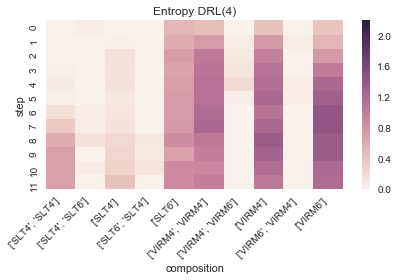

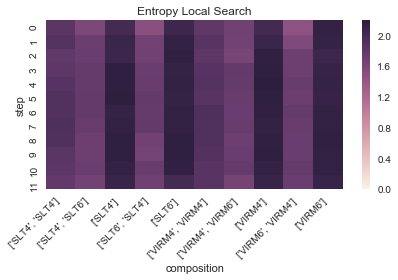

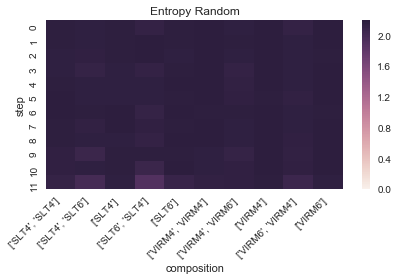

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

%matplotlib inline  

max_ = max(max(ent_data.ent_ej), max(ent_data.ent_roel), max(ent_data.ent_random))
min_ = min(min(ent_data.ent_ej), min(ent_data.ent_roel), min(ent_data.ent_random))

#entropies EJ
plt.figure()
sns.heatmap(ent_data.pivot(index='step', columns='composition', values='ent_ej'), vmin=min_, vmax=max_).set_title('Entropy DRL(4)')
plt.xticks(rotation=45, ha='right')
sns.plt.savefig('entropy_drl.eps')

#entropies ROEL
plt.figure()
sns.heatmap(ent_data.pivot(index='step', columns='composition', values='ent_roel'), vmin=min_, vmax=max_).set_title('Entropy Local Search')
plt.xticks(rotation=45, ha='right')
sns.plt.savefig('entropy_local.eps')

#entropies random
plt.figure()
sns.heatmap(ent_data.pivot(index='step', columns='composition', values='ent_random'), vmin=min_, vmax=max_).set_title('Entropy Random')
plt.xticks(rotation=45, ha='right')
sns.plt.savefig('entropy_random.eps')



# entropies on train type level

In [23]:
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

records = []
for type_ in new_data.strtype.unique():
    actions_roel = new_data.loc[new_data.strtype == type_].action_roel.astype('int64').copy()
    actions_ej = new_data.loc[new_data.strtype == type_].action.copy()
    actions_random = new_data.loc[new_data.strtype == type_].action_random.copy()
    ent_roel = ent(actions_roel)
    ent_ej = ent(actions_ej)
    ent_random = ent(actions_random)
    records.append({'type_': type_, 'algo': 'Local search', 'ent': ent_roel})
    records.append({'type_': type_, 'algo': 'DRL(4)', 'ent': ent_ej})
    records.append({'type_': type_, 'algo': 'Random', 'ent': ent_random})
    
ent_data = pd.DataFrame.from_records(records)
ent_data['composition'] = ent_data.apply(lambda row: row.type_.replace('14','SLT4').replace('16', 'SLT6').replace('24','VIRM4').replace('26','VIRM6'), axis =1 )
ent_data.head()

,algo,ent,type_,composition
0,Local search,2.184396,['14'],['SLT4']
1,DRL(4),0.156374,['14'],['SLT4']
2,Random,2.194945,['14'],['SLT4']
3,Local search,2.186269,['16'],['SLT6']
4,DRL(4),0.836362,['16'],['SLT6']


            algo       ent         type_         composition
0   Local search  2.184396        ['14']            ['SLT4']
1         DRL(4)  0.156374        ['14']            ['SLT4']
2         Random  2.194945        ['14']            ['SLT4']
3   Local search  2.186269        ['16']            ['SLT6']
4         DRL(4)  0.836362        ['16']            ['SLT6']
5         Random  2.195264        ['16']            ['SLT6']
6   Local search  2.189000        ['24']           ['VIRM4']
7         DRL(4)  1.155076        ['24']           ['VIRM4']
8         Random  2.196255        ['24']           ['VIRM4']
9   Local search  1.924683  ['24', '24']  ['VIRM4', 'VIRM4']
10        DRL(4)  1.222407  ['24', '24']  ['VIRM4', 'VIRM4']
11        Random  2.196729  ['24', '24']  ['VIRM4', 'VIRM4']
12  Local search  1.931604  ['14', '14']    ['SLT4', 'SLT4']
13        DRL(4)  0.336547  ['14', '14']    ['SLT4', 'SLT4']
14        Random  2.195628  ['14', '14']    ['SLT4', 'SLT4']
15  Local search  1.7848

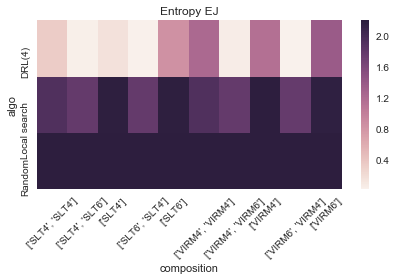

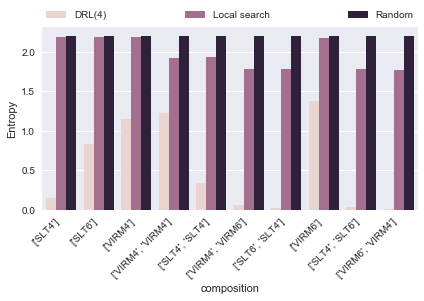

In [11]:
max_ = max(ent_data.ent)
min_ = min(ent_data.ent)

plt.figure()
sns.heatmap(ent_data.pivot(index='algo', columns='composition', values='ent'), vmin=min_, vmax=max_).set_title('Entropy EJ')
plt.xticks(rotation=45, ha='center')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
print(ent_data)
plt.figure()
plt.xticks(rotation=45, ha='right')
sns.barplot(x="composition", y="ent", hue='algo', hue_order=['DRL(4)','Local search', 'Random'], data=ent_data, palette=sns.cubehelix_palette(3))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
plt.ylabel('Entropy')

plt.savefig('overall_entropy.eps')


In [24]:
ent_data

,algo,ent,type_,composition
0,Local search,2.184396,['14'],['SLT4']
1,DRL(4),0.156374,['14'],['SLT4']
2,Random,2.194945,['14'],['SLT4']
3,Local search,2.186269,['16'],['SLT6']
4,DRL(4),0.836362,['16'],['SLT6']
5,Random,2.195264,['16'],['SLT6']
6,Local search,2.189000,['24'],['VIRM4']
7,DRL(4),1.155076,['24'],['VIRM4']
8,Random,2.196255,['24'],['VIRM4']
9,Local search,1.924683,"['24', '24']","['VIRM4', 'VIRM4']"


In [25]:
result_table = ent_data.pivot(index='algo', columns='composition', values='ent').round(2)

In [18]:
result_table.to_latex()

"\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\ncomposition &  ['SLT4', 'SLT4'] &  ['SLT4', 'SLT6'] &  ['SLT4'] &  ['SLT6', 'SLT4'] &  ['SLT6'] &  ['VIRM4', 'VIRM4'] &  ['VIRM4', 'VIRM6'] &  ['VIRM4'] &  ['VIRM6', 'VIRM4'] &  ['VIRM6'] \\\\\nalgo         &                   &                   &           &                   &           &                     &                     &            &                     &            \\\\\n\\midrule\nDRL(4)       &              0.34 &              0.04 &      0.16 &              0.03 &      0.84 &                1.22 &                0.06 &       1.16 &                0.02 &       1.37 \\\\\nLocal search &              1.93 &              1.79 &      2.18 &              1.78 &      2.19 &                1.92 &                1.78 &       2.19 &                1.77 &       2.18 \\\\\nRandom       &              2.20 &              2.20 &      2.19 &              2.19 &      2.20 &                2.20 &                2.19 &       2.20 &            

In [26]:
result_table

composition,"['SLT4', 'SLT4']","['SLT4', 'SLT6']",['SLT4'],"['SLT6', 'SLT4']",['SLT6'],"['VIRM4', 'VIRM4']","['VIRM4', 'VIRM6']",['VIRM4'],"['VIRM6', 'VIRM4']",['VIRM6']
algo,,,,,,,,,,
DRL(4),0.34,0.04,0.16,0.03,0.84,1.22,0.06,1.16,0.02,1.37
Local search,1.93,1.79,2.18,1.78,2.19,1.92,1.78,2.19,1.77,2.18
Random,2.20,2.20,2.19,2.19,2.20,2.20,2.19,2.20,2.20,2.20
